# Parameters

In [3]:
import os

# Option 1: Define the project root directory explicitly
parent_dir = "/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction"

# Define paths relative to the parent directory
data_path = os.path.join(parent_dir, 'data', 'processed')
model_path = os.path.join(parent_dir, 'model')
figures_dir = os.path.join(parent_dir, 'Results', 'figures')

print("Data Path:", data_path)
print("Model Path:", model_path)

data_file = os.path.join(data_path, 'american_bankruptcy_processed.csv')



Data Path: /Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/data/processed
Model Path: /Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model


In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

def uniform_evaluation(model, X_test, y_test):
    # Predict on test set
    y_pred = model.predict(X_test)

    # Model evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Data Preparation

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(data_file)
label_encoder = LabelEncoder()
df['status_label_bin'] = label_encoder.fit_transform(df['status_label'])

print(df.columns)
print(df.head)


Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'target_last', 'X8_log', 'X8_boxcox', 'X10_log',
       'X10_boxcox', 'left_censored', 'period_after_2008', 'current_ratio',
       'quick_ratio', 'debt_to_equity_ratio', 'long_term_debt_to_assets',
       'profit_margin', 'gross_margin', 'return_on_assets', 'return_on_equity',
       'asset_turnover', 'working_capital_to_assets',
       'retained_earnings_to_assets', 'ebit_to_assets',
       'market_value_to_liabilities', 'sales_to_assets', 'z_score',
       'bankruptcy', 'market_to_book', 'quick_ratio_reciprocal',
       'debt_to_equity_ratio_log', 'long_term_debt_to_assets_reciprocal',
       'working_capital_to_assets_sqrt', 'z_score_log', 'market_to_book_log',
       'return_on_equity_log', 'return_on_assets_shifted',
       'profit_margin_shifted', 'event', 'duration', 'status_label_bin'],
      dtype='ob

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

# Instead of selecting specific features, select all columns except these ones
exclude_columns = ['company_name', 'status_label', 'status_label_bin', 'event', 'duration', 'target_last']

# Get all feature columns by excluding non-feature columns
X = df.drop(exclude_columns, axis=1)

# Target variable remains the same
y = df['status_label_bin']  # Target variable (1 for bankruptcy, 0 for no bankruptcy)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Advanced Sampling

In [7]:
## Advanced Sampling Techniques for Handling Class Imbalance

print("Original class distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))

# Import various sampling techniques
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN

# Create different resampled datasets
sampling_techniques = {}

# 1. Standard SMOTE (already used in your original code)
smote_standard = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote_standard.fit_resample(X_train, y_train)
sampling_techniques['Standard SMOTE'] = (X_resampled_smote, y_resampled_smote)

# 2. More aggressive SMOTE (50% ratio)
smote_aggressive = SMOTE(random_state=42, sampling_strategy=0.5)
X_resampled_smote_agg, y_resampled_smote_agg = smote_aggressive.fit_resample(X_train, y_train)
sampling_techniques['Aggressive SMOTE (50%)'] = (X_resampled_smote_agg, y_resampled_smote_agg)

# 3. ADASYN (Adaptive Synthetic Sampling)
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)
sampling_techniques['ADASYN'] = (X_resampled_adasyn, y_resampled_adasyn)

# 4. BorderlineSMOTE (focuses on samples near the decision boundary)
bsmote = BorderlineSMOTE(random_state=42)
X_resampled_bsmote, y_resampled_bsmote = bsmote.fit_resample(X_train, y_train)
sampling_techniques['BorderlineSMOTE'] = (X_resampled_bsmote, y_resampled_bsmote)

# 5. Combined approach: SMOTE + Tomek links (oversampling + cleaning)
smote_tomek = SMOTETomek(random_state=42)
X_resampled_smote_tomek, y_resampled_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
sampling_techniques['SMOTE+Tomek'] = (X_resampled_smote_tomek, y_resampled_smote_tomek)

# 6. Combined approach: SMOTE + ENN (oversampling + cleaning)
smote_enn = SMOTEENN(random_state=42)
X_resampled_smote_enn, y_resampled_smote_enn = smote_enn.fit_resample(X_train, y_train)
sampling_techniques['SMOTE+ENN'] = (X_resampled_smote_enn, y_resampled_smote_enn)

# 7. Under-sampling approach
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.5)  # Keep 50% of majority class
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)
sampling_techniques['RandomUnderSampler'] = (X_resampled_rus, y_resampled_rus)

# Print class distribution after resampling
for name, (X_res, y_res) in sampling_techniques.items():
    print(f"\nClass distribution after {name}:")
    print(pd.Series(y_res).value_counts(normalize=True))
    print(f"Total samples: {len(y_res)}")

Original class distribution in training set:
status_label_bin
0    0.933656
1    0.066344
Name: proportion, dtype: float64

Class distribution after Standard SMOTE:
status_label_bin
0    0.5
1    0.5
Name: proportion, dtype: float64
Total samples: 117538

Class distribution after Aggressive SMOTE (50%):
status_label_bin
0    0.66667
1    0.33333
Name: proportion, dtype: float64
Total samples: 88153

Class distribution after ADASYN:
status_label_bin
0    0.500626
1    0.499374
Name: proportion, dtype: float64
Total samples: 117391

Class distribution after BorderlineSMOTE:
status_label_bin
0    0.5
1    0.5
Name: proportion, dtype: float64
Total samples: 117538

Class distribution after SMOTE+Tomek:
status_label_bin
0    0.5
1    0.5
Name: proportion, dtype: float64
Total samples: 117342

Class distribution after SMOTE+ENN:
status_label_bin
1    0.558261
0    0.441739
Name: proportion, dtype: float64
Total samples: 103731

Class distribution after RandomUnderSampler:
status_label_bin
0 

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
import joblib

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_resampled_smote, y_resampled_smote)

uniform_evaluation(rf_model, X_test, y_test)

joblib.dump(rf_model, os.path.join(model_path, 'random_forest.pkl') )

Accuracy: 0.9389337230730126
F1 Score: 0.9335216969740634
Precision: 0.9305457249409543
Recall: 0.9389337230730126

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14693
           1       0.56      0.38      0.45      1044

    accuracy                           0.94     15737
   macro avg       0.76      0.68      0.71     15737
weighted avg       0.93      0.94      0.93     15737


Confusion Matrix:
 [[14378   315]
 [  646   398]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/random_forest.pkl']

Total parameter combinations to try: 16
Estimated time: 2.7 minutes (assuming ~10 seconds per fit)

Starting Grid Search for Random Forest...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END class_weight=balanced, max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END class_weight=balanced, max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END class_weight=balanced, max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END class_weight=balanced, max_depth=None, min_samples_split=2, n_estimators=200; total time= 2.7min
[CV] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.3min
[CV] END class_weight=balanced, max_depth=30, min_sampl

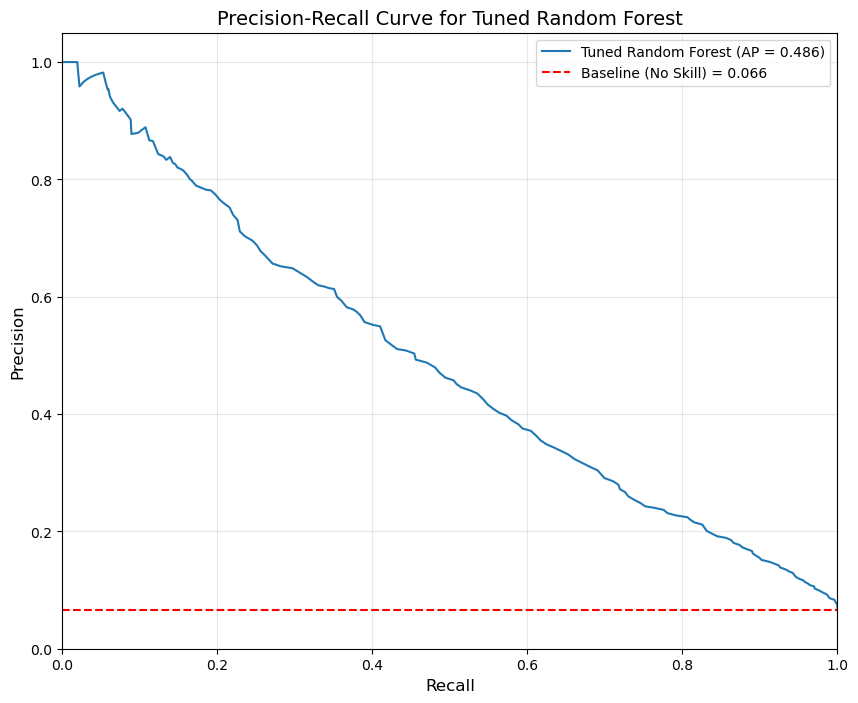

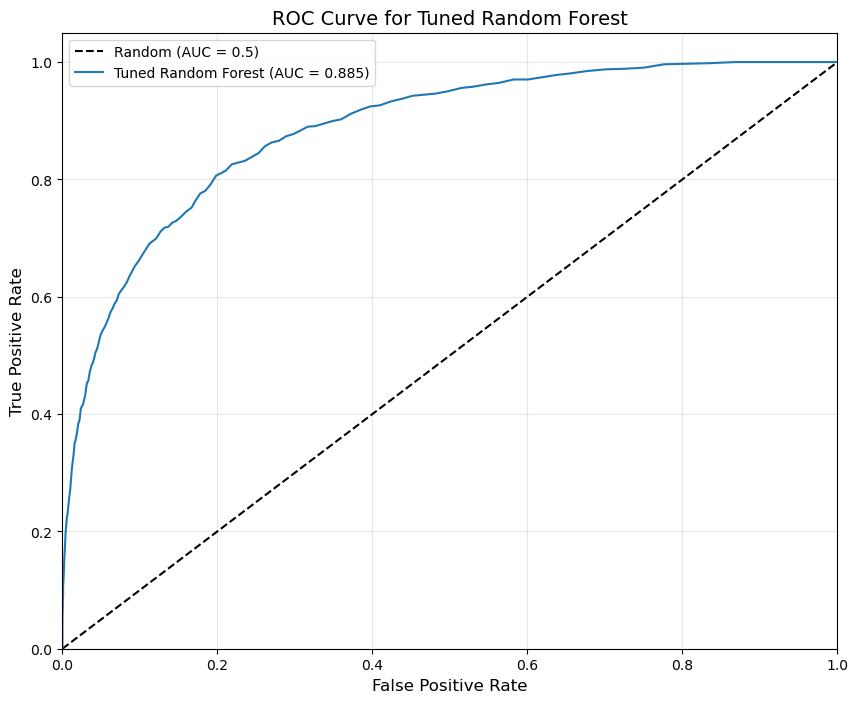

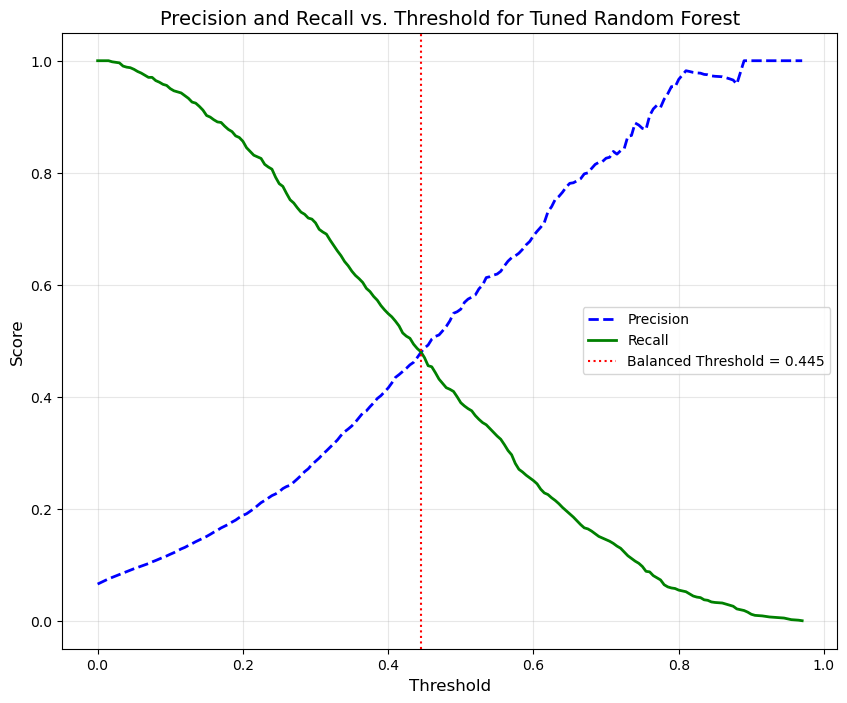


=== Random Forest with Optimized Threshold (0.445) ===
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14693
           1       0.48      0.48      0.48      1044

    accuracy                           0.93     15737
   macro avg       0.72      0.72      0.72     15737
weighted avg       0.93      0.93      0.93     15737

Confusion Matrix:
[[14148   545]
 [  542   502]]


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib
import os
import time
from datetime import timedelta
from tqdm import tqdm

# Start timing
start_time = time.time()

# Reduced parameter grid focusing on most impactful parameters
param_grid = {
    'n_estimators': [100, 200],                  # Reduced options
    'max_depth': [None, 30],                     # Reduced options
    'min_samples_split': [2, 5],                 # Reduced options
    'class_weight': ['balanced', 'balanced_subsample']
}

# Calculate total combinations for progress tracking
total_combinations = 2 * 2 * 2 * 2  # = 16 combinations
print(f"Total parameter combinations to try: {total_combinations}")
print(f"Estimated time: {total_combinations * 10 / 60:.1f} minutes (assuming ~10 seconds per fit)")

# Create the base model
rf_base = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
rf_grid = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,                     # Cross-validation folds
    verbose=2,                # Increased verbosity for progress tracking
    n_jobs=-1,                # Use all available cores
    scoring='f1'              # Optimize for F1 score
)

# Fit the grid search
print("\nStarting Grid Search for Random Forest...")
rf_grid.fit(X_resampled_smote, y_resampled_smote)

# Calculate total time
total_time = time.time() - start_time
print(f"\nGrid search completed in {timedelta(seconds=int(total_time))}")

# Print the best parameters
print("\nBest parameters found:")
for param, value in rf_grid.best_params_.items():
    print(f"{param}: {value}")

print(f"Best F1 score: {rf_grid.best_score_:.4f}")

# Get the best model
rf_model_tuned = rf_grid.best_estimator_

# Evaluate the tuned model
print("\n=== Tuned Random Forest Model ===")
uniform_evaluation(rf_model_tuned, X_test, y_test)

# Save the tuned model
joblib.dump(rf_model_tuned, os.path.join(model_path, 'random_forest_tuned.pkl'))




=== Random Forest with Standard SMOTE ===
Accuracy: 0.9389
Precision: 0.5582
Recall: 0.3812
F1 Score: 0.4530


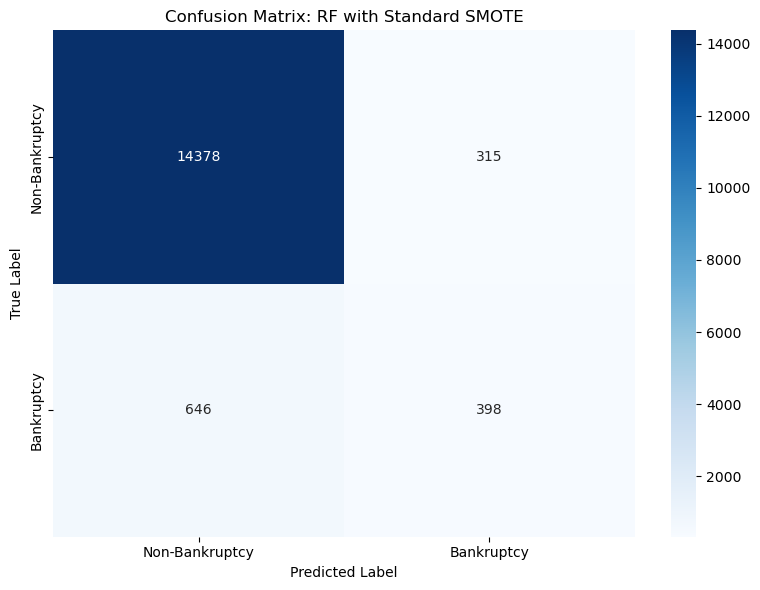


=== Random Forest with Aggressive SMOTE (50%) ===
Accuracy: 0.9447
Precision: 0.6901
Recall: 0.3008
F1 Score: 0.4189


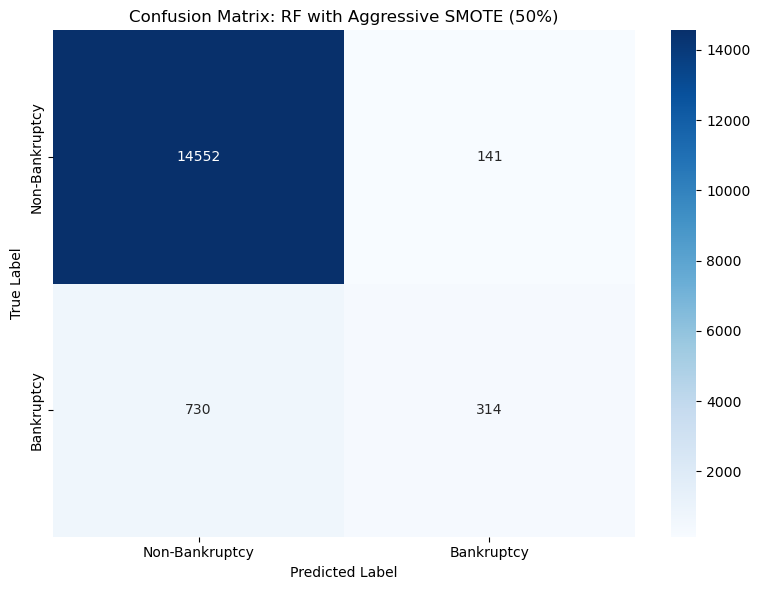


=== Random Forest with ADASYN ===
Accuracy: 0.9373
Precision: 0.5386
Recall: 0.3812
F1 Score: 0.4464


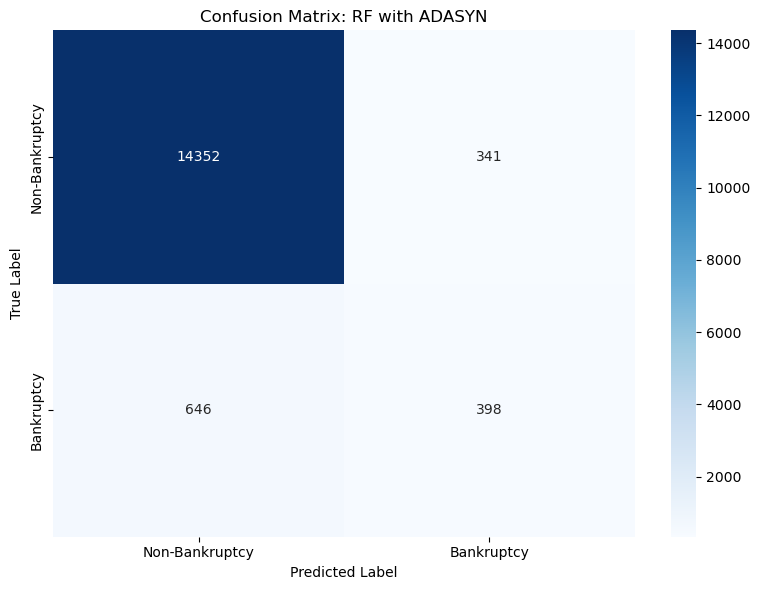


=== Random Forest with BorderlineSMOTE ===
Accuracy: 0.9403
Precision: 0.5825
Recall: 0.3515
F1 Score: 0.4385


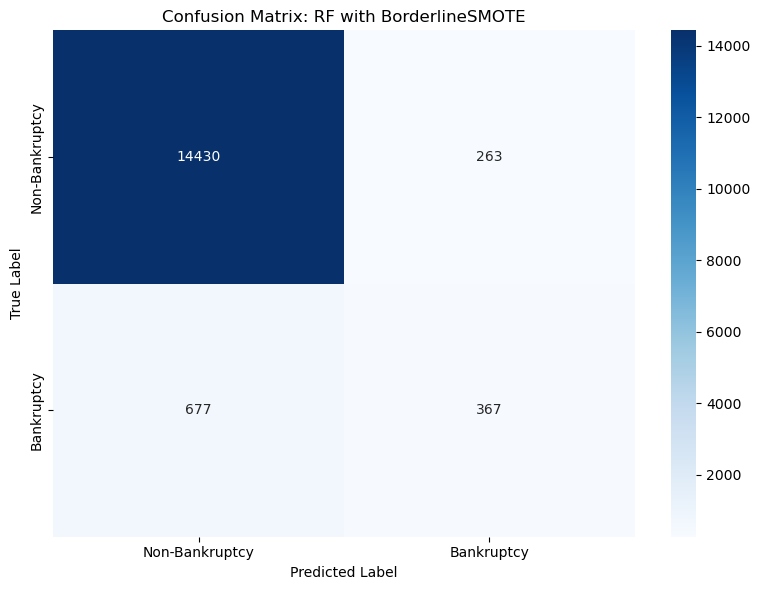


=== Random Forest with SMOTE+Tomek ===
Accuracy: 0.9382
Precision: 0.5497
Recall: 0.3764
F1 Score: 0.4468


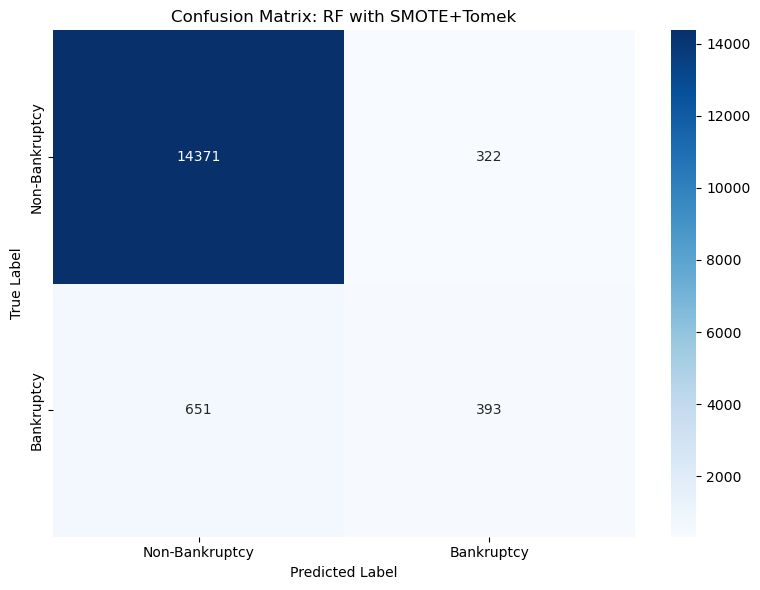


=== Random Forest with SMOTE+ENN ===
Accuracy: 0.9063
Precision: 0.3551
Recall: 0.5057
F1 Score: 0.4172


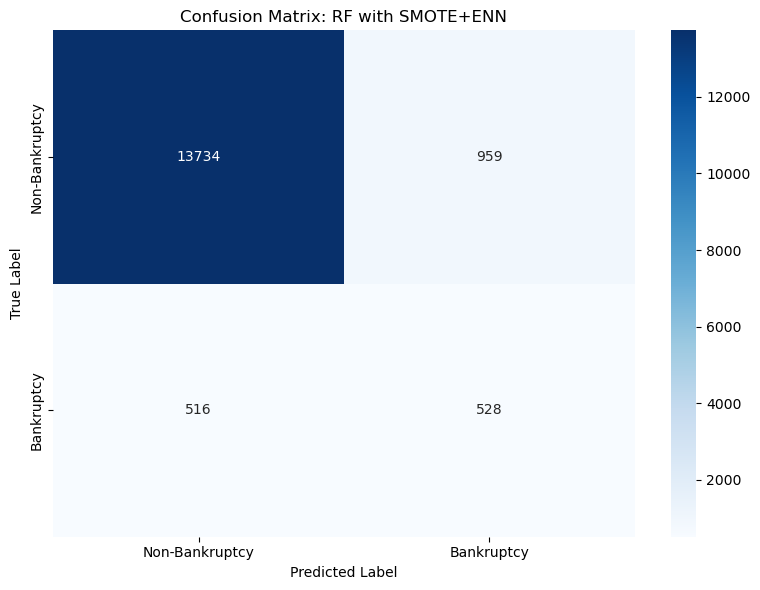


=== Random Forest with RandomUnderSampler ===
Accuracy: 0.8771
Precision: 0.2779
Recall: 0.5335
F1 Score: 0.3655


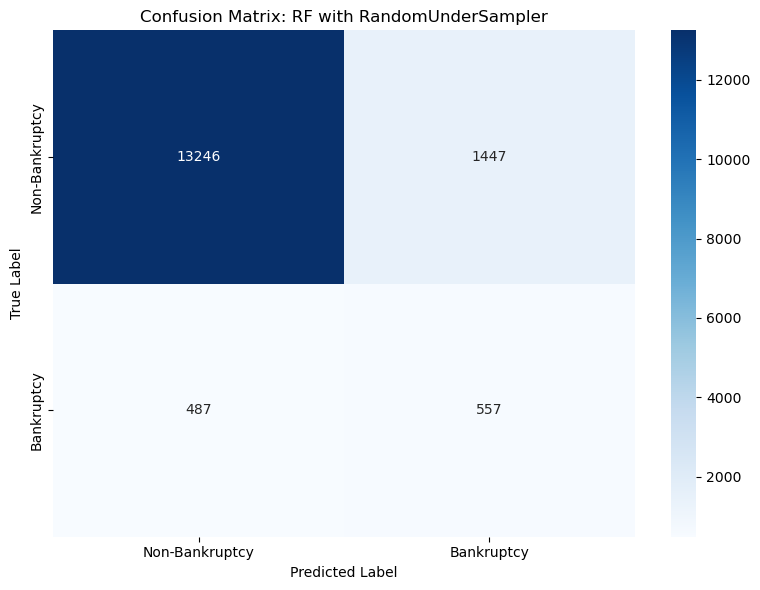


Combined Results Summary (sorted by F1 Score):
                 Sampling          Model  Accuracy  Precision    Recall  \
0          Standard SMOTE  Random Forest  0.938934   0.558205  0.381226   
4             SMOTE+Tomek  Random Forest  0.938171   0.549650  0.376437   
2                  ADASYN  Random Forest  0.937282   0.538566  0.381226   
3         BorderlineSMOTE  Random Forest  0.940268   0.582540  0.351533   
1  Aggressive SMOTE (50%)  Random Forest  0.944653   0.690110  0.300766   
5               SMOTE+ENN  Random Forest  0.906272   0.355077  0.505747   
6      RandomUnderSampler  Random Forest  0.877105   0.277944  0.533525   

   F1 Score  
0  0.453045  
4  0.446845  
2  0.446439  
3  0.438471  
1  0.418946  
5  0.417226  
6  0.365486  


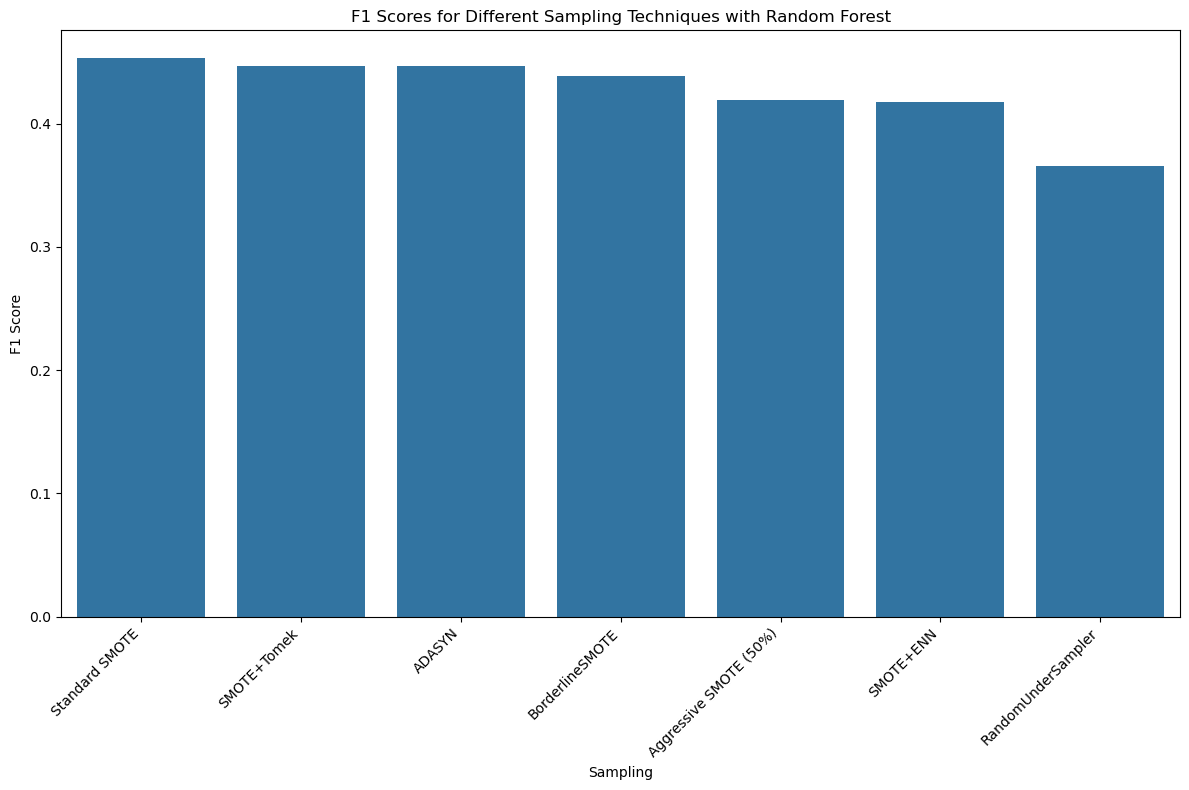


Best combination: Standard SMOTE with Random Forest
F1 Score: 0.4530
Precision: 0.5582
Recall: 0.3812


In [14]:
## Combining Sampling Techniques with Models
import matplotlib.pyplot as plt
import seaborn as sns
# Dictionary to store results
combined_results = []

# We'll use Random Forest as our base model and try different sampling techniques
for sampling_name, (X_res, y_res) in sampling_techniques.items():
    # Train Random Forest on resampled data
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_res, y_res)
    
    # Evaluate
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    combined_results.append({
        'Sampling': sampling_name,
        'Model': 'Random Forest',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    print(f"\n=== Random Forest with {sampling_name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bankruptcy', 'Bankruptcy'],
                yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix: RF with {sampling_name}')
    plt.tight_layout()
    figures_dir = os.path.join(parent_dir, 'Results', 'figures')
    # Then save the figure
    plt.savefig(os.path.join(figures_dir, f'RF_{sampling_name.replace(" ", "_")}_cm.png'), 
            dpi=300, bbox_inches='tight')
    plt.show()

# Create a DataFrame for easy comparison
combined_results_df = pd.DataFrame(combined_results)
print("\nCombined Results Summary (sorted by F1 Score):")
print(combined_results_df.sort_values('F1 Score', ascending=False))

# Visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Sampling', y='F1 Score', data=combined_results_df.sort_values('F1 Score', ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('F1 Scores for Different Sampling Techniques with Random Forest')
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'sampling_techniques_comparison.png'), dpi=300, bbox_inches='tight')
plt.show()

# Find the best combination
best_combination = combined_results_df.sort_values('F1 Score', ascending=False).iloc[0]
print(f"\nBest combination: {best_combination['Sampling']} with Random Forest")
print(f"F1 Score: {best_combination['F1 Score']:.4f}")
print(f"Precision: {best_combination['Precision']:.4f}")
print(f"Recall: {best_combination['Recall']:.4f}")

# XGBoost

In [36]:
## XGBoost with Best Sampling Technique
from xgboost import XGBClassifier
# Get the best sampling technique name
best_sampling = best_combination['Sampling']
X_best, y_best = sampling_techniques[best_sampling]

# Train XGBoost with the best sampling technique
xgb_best = XGBClassifier(
    n_estimators=100, 
    random_state=42,
    eval_metric='logloss'
)
xgb_best.fit(X_best, y_best)

# Evaluate
print(f"\n=== XGBoost with {best_sampling} ===")
xgb_best_pred = uniform_evaluation(xgb_best, X_test, y_test)

# Save the model
joblib.dump(xgb_best, os.path.join(model_path, f'xgboost_with_{best_sampling.replace(" ", "_")}.pkl'))



=== XGBoost with Standard SMOTE ===
Accuracy: 0.9072885556332211
F1 Score: 0.9118636683452941
Precision: 0.9171519799637906
Recall: 0.9072885556332211

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     14693
           1       0.34      0.42      0.38      1044

    accuracy                           0.91     15737
   macro avg       0.65      0.68      0.66     15737
weighted avg       0.92      0.91      0.91     15737


Confusion Matrix:
 [[13838   855]
 [  604   440]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/xgboost_with_Standard_SMOTE.pkl']

# SVM

In [ ]:
# from sklearn.svm import LinearSVC

# svm_model = LinearSVC(random_state=42, class_weight='balanced', max_iter=5000)
# svm_model.fit(X_train, y_train)

# uniform_evaluation(svm_model, X_test, y_test)


# joblib.dump(svm_model, os.path.join(model_path, 'svm.pkl') )

# NN Based Model

In [38]:
# NN with Best Sampling Technique
from sklearn.neural_network import MLPClassifier
# Train NN with the best sampling technique
X_best, y_best = sampling_techniques[best_sampling]
nn_best = MLPClassifier(
    hidden_layer_sizes=(200, 100, 50),  # Try deeper or wider architecture
    max_iter=1000,                      # Increase max iterations
    solver='adam',                      # Keep adam solver
    activation='relu',                  # Keep ReLU activation
    alpha=0.0001,                       # Regularization parameter
    learning_rate='adaptive',           # Try adaptive learning rate
    early_stopping=True,                # Add early stopping
    validation_fraction=0.1,            # Use 10% of training data for validation
    n_iter_no_change=10,                # Stop if no improvement for 10 iterations
    batch_size='auto',                  # Try different batch sizes
    random_state=42                     # For reproducibility
)
nn_best.fit(X_best, y_best)
# Evaluate
print(f"\n=== NN with {best_sampling} ===")
nn_best_pred = uniform_evaluation(nn_best, X_test, y_test)
# Save the model
joblib.dump(nn_best, os.path.join(model_path, f'nn_with_{best_sampling.replace(" ", "_")}.pkl'))


=== NN with Standard SMOTE ===
Accuracy: 0.631759547563068
F1 Score: 0.7235892418500467
Precision: 0.9111800925983491
Recall: 0.631759547563068

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.63      0.76     14693
           1       0.12      0.70      0.20      1044

    accuracy                           0.63     15737
   macro avg       0.54      0.67      0.48     15737
weighted avg       0.91      0.63      0.72     15737


Confusion Matrix:
 [[9207 5486]
 [ 309  735]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/nn_with_Standard_SMOTE.pkl']

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

# Define a smaller parameter grid
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],  # Fewer architectures
    'alpha': [0.0001, 0.001],  # Fewer regularization values
    'learning_rate': ['adaptive'],  # Just use adaptive learning rate
    'batch_size': [64, 'auto']  # Fewer batch size options
}

# Create a base model with early stopping
base_model = MLPClassifier(
    max_iter=500,  # Reduced from 1000
    solver='adam',
    activation='relu',
    early_stopping=True,  # Add early stopping
    validation_fraction=0.1,
    n_iter_no_change=5,  # Stop earlier if no improvement
    random_state=42
)

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(
    base_model,
    param_distributions=param_distributions,
    n_iter=10,  # Try only 10 combinations instead of all possible ones
    cv=3,       # Reduced from 5-fold to 3-fold cross-validation
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Optional: Use a subset of data for faster tuning
# Uncomment if you have a very large dataset
# from sklearn.model_selection import train_test_split
# X_sample, _, y_sample, _ = train_test_split(X_best, y_best, train_size=0.5, random_state=42)
# random_search.fit(X_sample, y_sample)

# Or use the full dataset
random_search.fit(X_best, y_best)

# Get best parameters and model
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")
nn_best = random_search.best_estimator_

# Evaluate
print(f"\n=== Optimized NN with {best_sampling} ===")
uniform_evaluation(nn_best, X_test, y_test)

# Save the model
joblib.dump(nn_best, os.path.join(model_path, f'optimized_nn_with_{best_sampling.replace(" ", "_")}.pkl'))


Best parameters: {'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'batch_size': 'auto', 'alpha': 0.0001}

=== Optimized NN with Standard SMOTE ===
Accuracy: 0.6836118701150156
F1 Score: 0.7628576240677836
Precision: 0.9056780245026145
Recall: 0.6836118701150156

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     14693
           1       0.12      0.61      0.20      1044

    accuracy                           0.68     15737
   macro avg       0.54      0.65      0.50     15737
weighted avg       0.91      0.68      0.76     15737


Confusion Matrix:
 [[10121  4572]
 [  407   637]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/optimized_nn_with_Standard_SMOTE.pkl']

# Voting Classifier for Model Ensemble (hard voting: majority rule)

In [31]:
from sklearn.ensemble import VotingClassifier

best_sampling = best_combination['Sampling']
X_best, y_best = sampling_techniques[best_sampling]

voting_hard = VotingClassifier(
    estimators=[('rf', rf_model), 
                ('xgb', xgb_best), 
                # ('svm', svm_model), 
                ('nn', nn_best)],
    voting='hard',  # Use hard voting
    flatten_transform=True,  # Flatten the output
)

voting_hard.fit(X_best, y_best)

uniform_evaluation(voting_hard, X_test, y_test)

joblib.dump(voting_hard, os.path.join(model_path, 'voting_hard.pkl'))

Accuracy: 0.9149138971849781
F1 Score: 0.917980652154147
Precision: 0.9214461253252236
Recall: 0.9149138971849781

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     14693
           1       0.38      0.44      0.41      1044

    accuracy                           0.91     15737
   macro avg       0.67      0.70      0.68     15737
weighted avg       0.92      0.91      0.92     15737


Confusion Matrix:
 [[13935   758]
 [  581   463]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/voting_hard.pkl']

# Soft Voting (Weighted Average of Probabilities)

In [28]:
best_sampling = best_combination['Sampling']
X_best, y_best = sampling_techniques[best_sampling]

voting_soft = VotingClassifier(
    estimators=[('rf', rf_model), 
                ('xgb', xgb_best), 
                # ('svm', svm_model), 
                ('nn', nn_best)],
    voting='soft'  # Soft voting (average probabilities)
)

voting_soft.fit(X_best, y_best)

uniform_evaluation(voting_soft, X_test, y_test)

joblib.dump(voting_soft, os.path.join(model_path, 'voting_soft.pkl'))

Accuracy: 0.8685899472580543
F1 Score: 0.8887943053467632
Precision: 0.9180570833980286
Recall: 0.8685899472580543

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93     14693
           1       0.26      0.54      0.35      1044

    accuracy                           0.87     15737
   macro avg       0.61      0.72      0.64     15737
weighted avg       0.92      0.87      0.89     15737


Confusion Matrix:
 [[13105  1588]
 [  480   564]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/voting_soft.pkl']

# Model Evaluation Section

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score

def evaluate_model_with_curves(model, X_test, y_test, model_name):
    """
    Comprehensive model evaluation function that generates:
    1. Precision-Recall curve
    2. ROC curve
    3. Precision and Recall vs Threshold plot
    
    Parameters:
    -----------
    model : trained model with predict_proba method
    X_test : test features
    y_test : test labels
    model_name : string name of the model for plot labels
    """
    # Get probability predictions
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # Calculate metrics
    average_precision = average_precision_score(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    # 1. Precision-Recall Curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.figure(figsize=(10, 8))
    
    # Plot the precision-recall curve
    plt.plot(recall, precision, label=f'{model_name} (AP = {average_precision:.3f})')
    
    # Plot the baseline (proportion of positive class)
    baseline = np.sum(y_test) / len(y_test)
    plt.axhline(y=baseline, color='r', linestyle='--', 
                label=f'Baseline (No Skill) = {baseline:.3f}')
    
    # Add labels and title
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(f'Precision-Recall Curve for {model_name}', fontsize=14)
    
    # Set axis limits
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Add legend and grid
    plt.legend(loc='best', fontsize=10)
    plt.grid(alpha=0.3)
    plt.savefig(os.path.join(figures_dir, f'{model_name.replace(" ", "_")}_PR_curve.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. ROC Curve
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')
    
    # Add labels and title
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve for {model_name}', fontsize=14)
    
    # Add legend and grid
    plt.legend(loc='best', fontsize=10)
    plt.grid(alpha=0.3)
    
    # Set axis limits
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.savefig(os.path.join(figures_dir, f'{model_name.replace(" ", "_")}_ROC_curve.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    # 3. Precision and Recall vs Threshold
    plt.figure(figsize=(10, 8))
    
    plt.plot(pr_thresholds, precision[:-1], 'b--', linewidth=2, label='Precision')
    plt.plot(pr_thresholds, recall[:-1], 'g-', linewidth=2, label='Recall')
    
    # Find the threshold where precision and recall are closest
    closest_idx = np.argmin(np.abs(precision[:-1] - recall[:-1]))
    optimal_threshold = pr_thresholds[closest_idx]
    
    plt.axvline(x=optimal_threshold, color='r', linestyle=':', 
                label=f'Balanced Threshold = {optimal_threshold:.3f}')
    
    plt.xlabel('Threshold', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.title(f'Precision and Recall vs. Threshold for {model_name}', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.savefig(os.path.join(figures_dir, f'{model_name.replace(" ", "_")}_threshold_analysis.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    # Return key metrics and optimal threshold
    return {
        'model_name': model_name,
        'average_precision': average_precision,
        'auc_score': auc_score,
        'optimal_threshold': optimal_threshold
    }

## Create a directory for saving figures if it doesn't exist

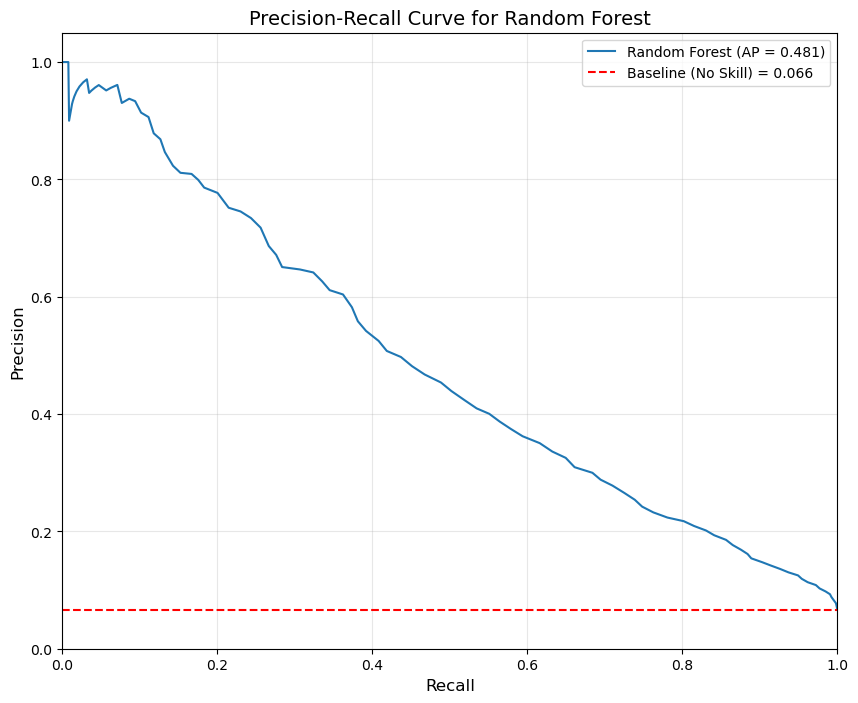

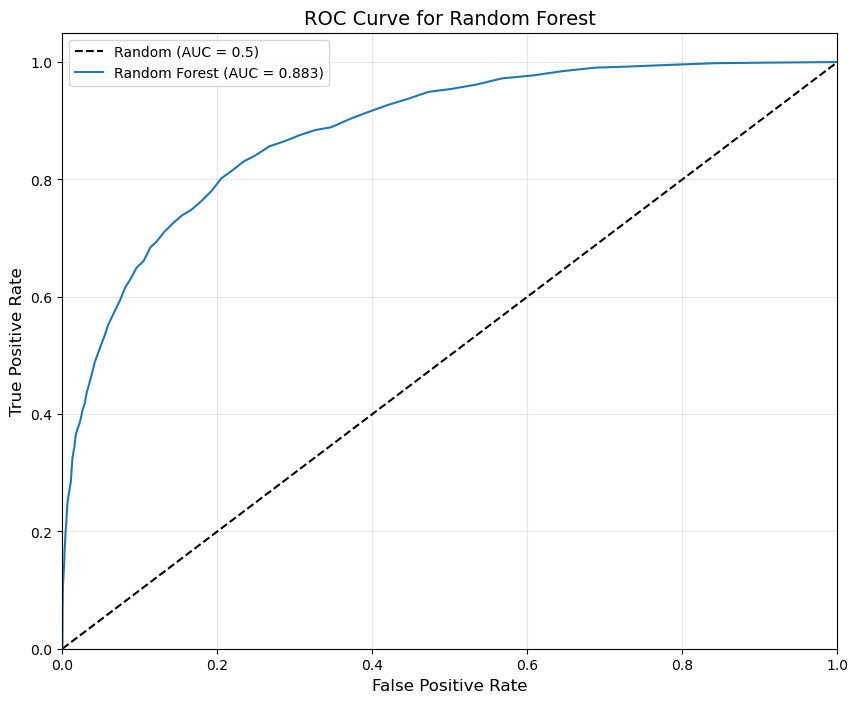

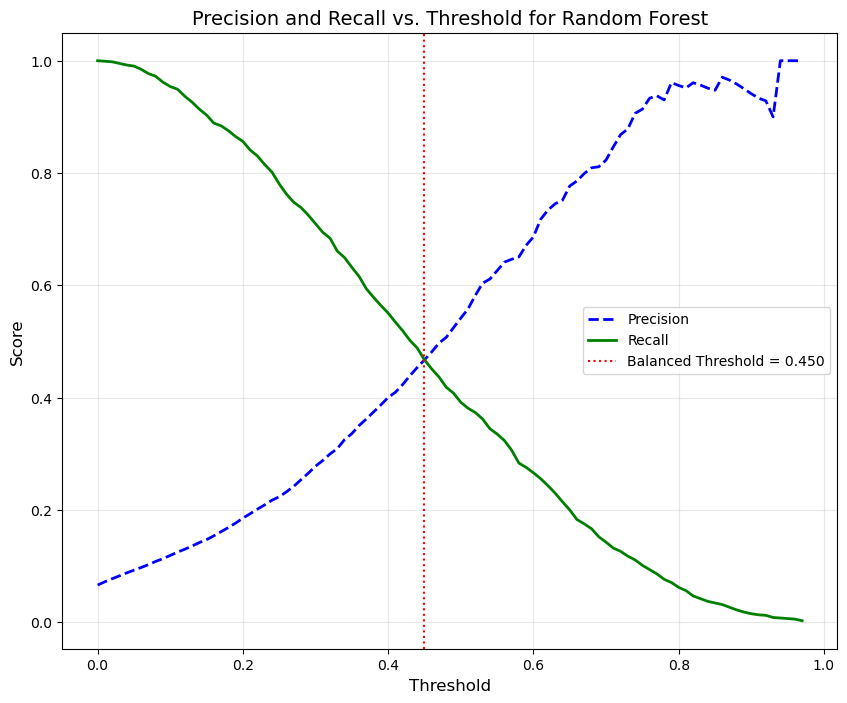

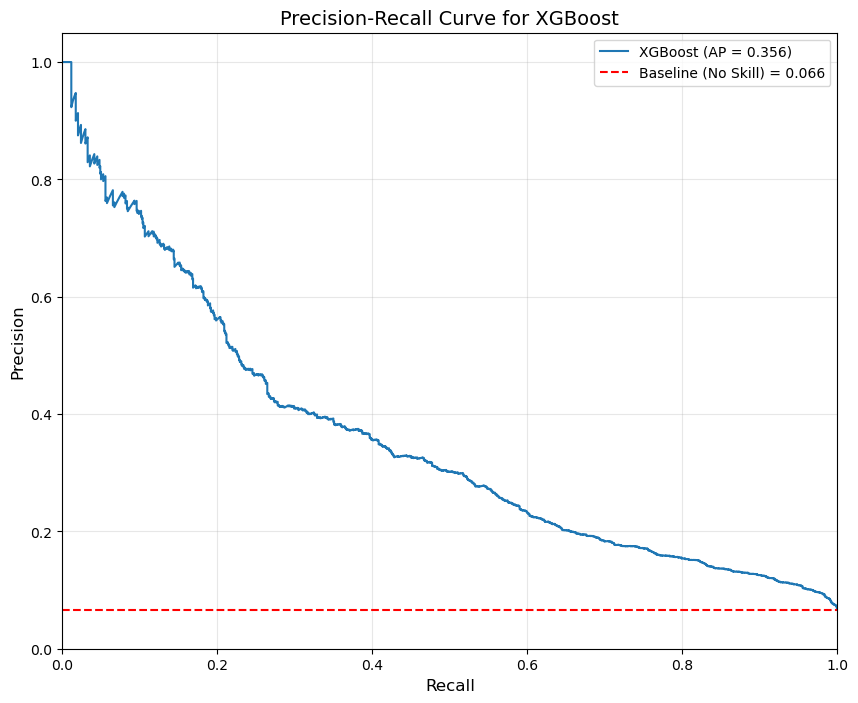

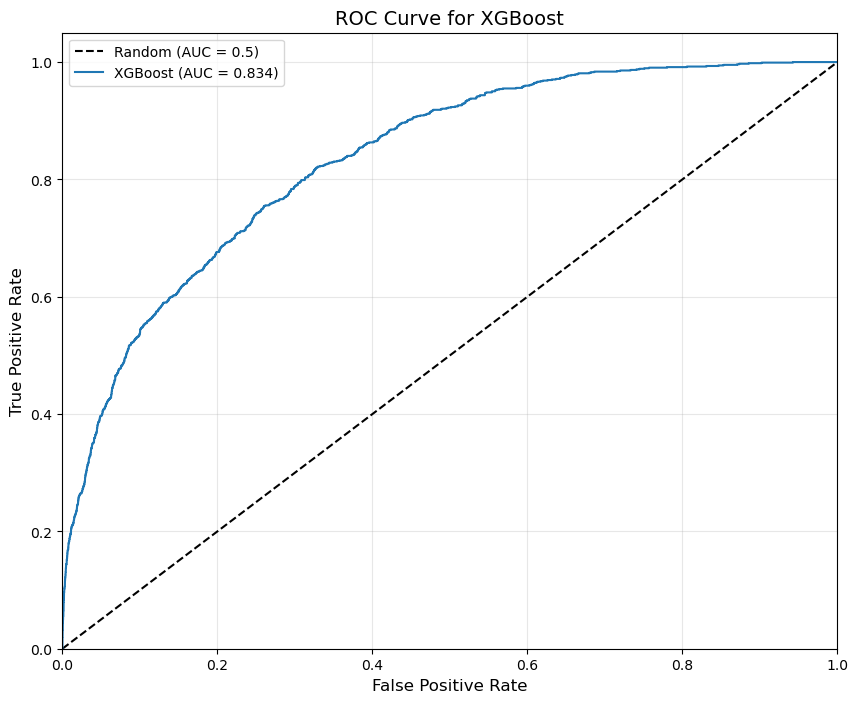

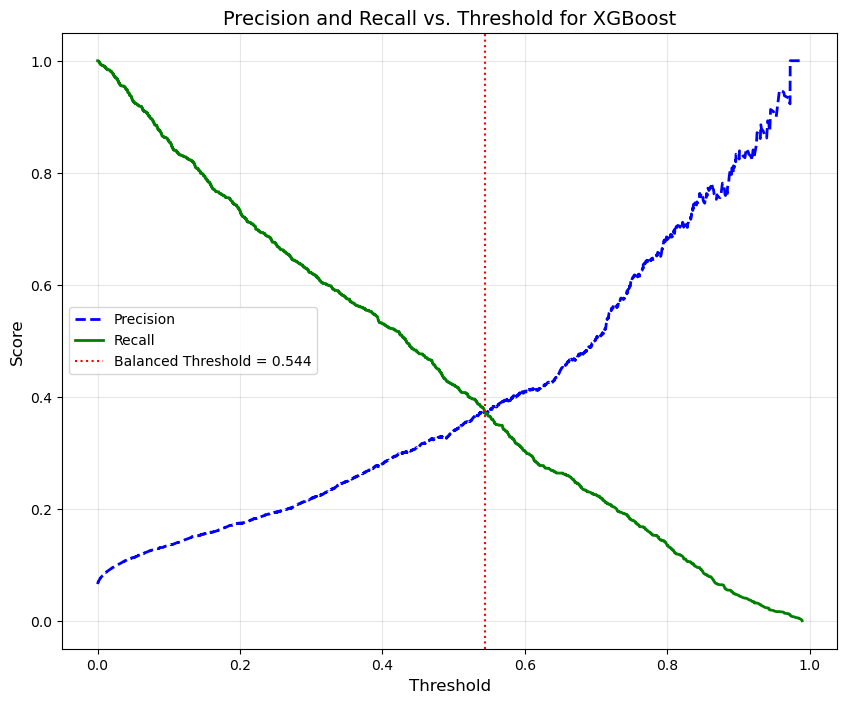

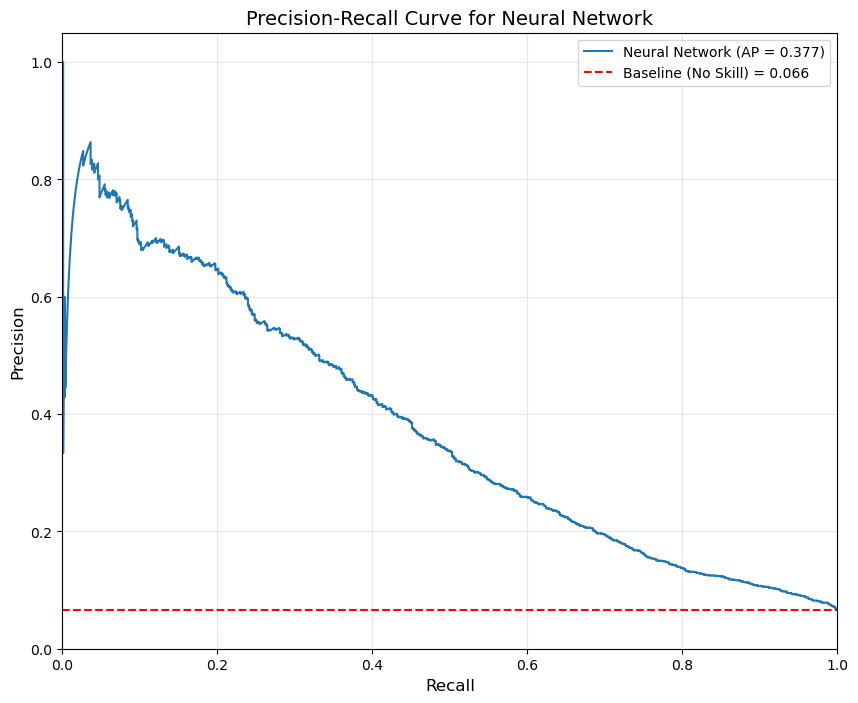

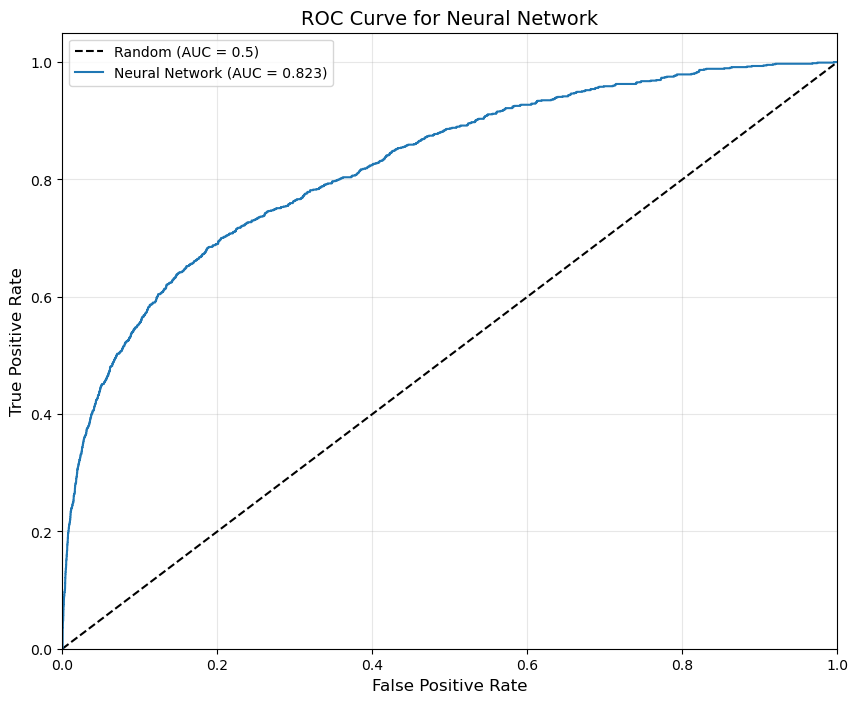

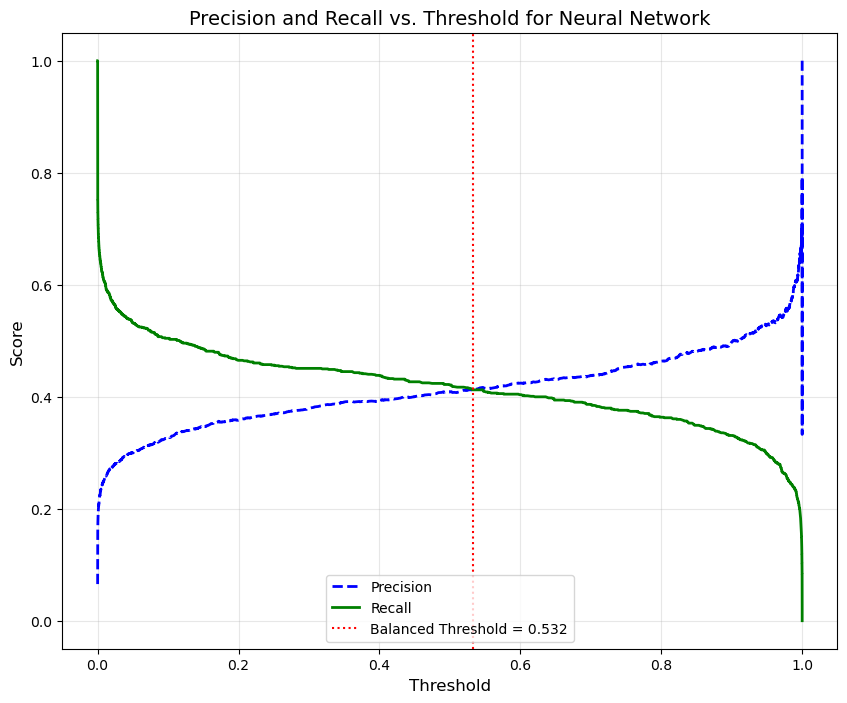

In [45]:
import os
figures_dir = os.path.join(parent_dir, 'Results', 'figures')
os.makedirs(figures_dir, exist_ok=True)

# Evaluate all models and collect results
evaluation_results = []

# Evaluate Random Forest
rf_results = evaluate_model_with_curves(rf_model, X_test, y_test, "Random Forest")
evaluation_results.append(rf_results)

# Evaluate XGBoost
xgb_results = evaluate_model_with_curves(xgb_best, X_test, y_test, "XGBoost")
evaluation_results.append(xgb_results)

# Evaluate Neural Network
nn_results = evaluate_model_with_curves(nn_complex, X_test_poly_scaled, y_test, "Neural Network")
evaluation_results.append(nn_results)


## Create a DataFrame to compare all models

Model Evaluation Summary:
       model_name  average_precision  auc_score  optimal_threshold
0   Random Forest           0.480519   0.882877            0.45000
2  Neural Network           0.376698   0.823058            0.53249
1         XGBoost           0.355730   0.834314            0.54371


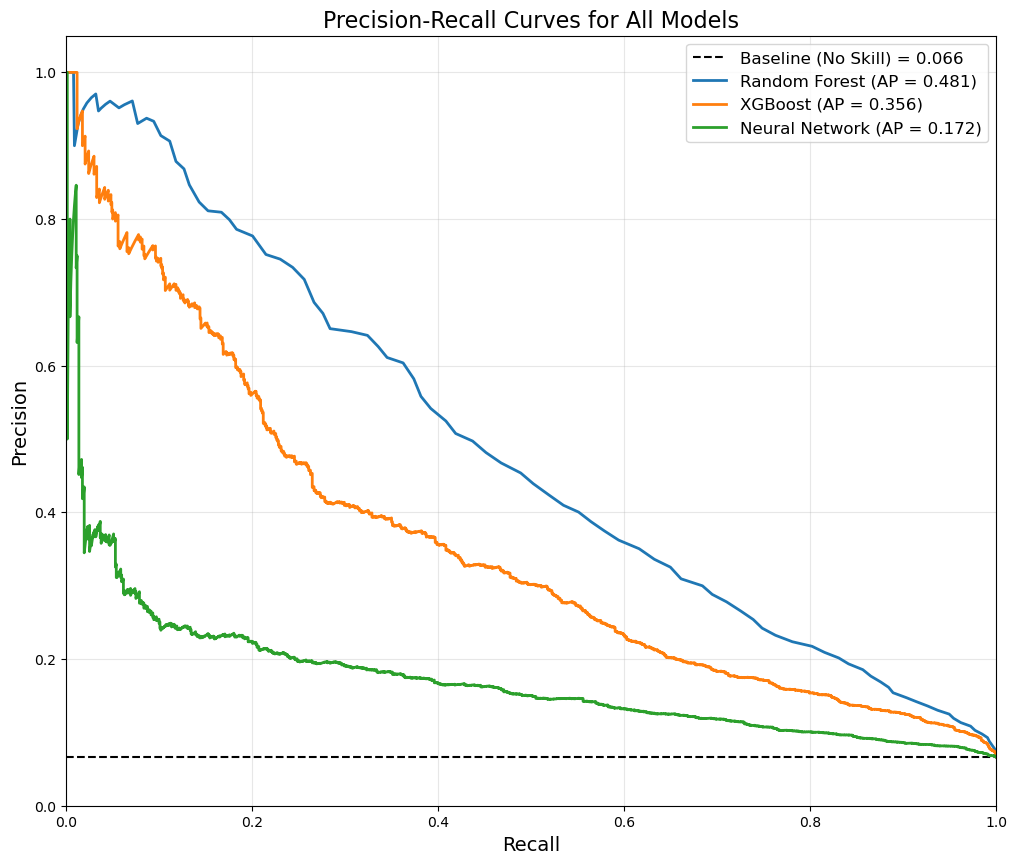

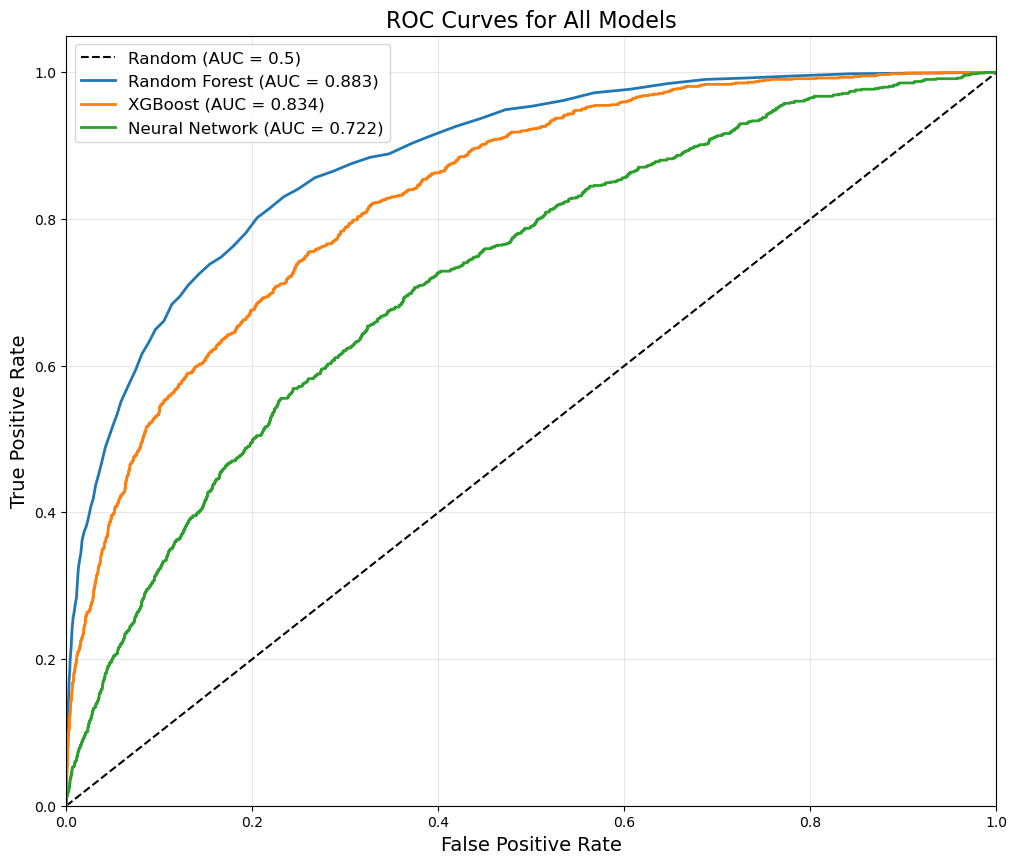

In [49]:
import pandas as pd
results_df = pd.DataFrame(evaluation_results)
print("Model Evaluation Summary:")
print(results_df.sort_values('average_precision', ascending=False))

# Plot comparison of all models on a single PR curve
plt.figure(figsize=(12, 10))

# Get baseline
baseline = np.sum(y_test) / len(y_test)
plt.axhline(y=baseline, color='k', linestyle='--', 
            label=f'Baseline (No Skill) = {baseline:.3f}')

# Add each model to the plot
for model_name, model in [
    ("Random Forest", rf_model),
    ("XGBoost", xgb_best),
    ("Neural Network", nn_best),
]:
    y_pred_prob = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    ap = average_precision_score(y_test, y_pred_prob)
    plt.plot(recall, precision, linewidth=2, label=f'{model_name} (AP = {ap:.3f})')

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curves for All Models', fontsize=16)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='best', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig(os.path.join(figures_dir, 'all_models_PR_comparison.png'), dpi=300, bbox_inches='tight')
plt.show()

# Plot comparison of all models on a single ROC curve
plt.figure(figsize=(12, 10))

# Add diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

# Add each model to the plot
for model_name, model in [
    ("Random Forest", rf_model),
    ("XGBoost", xgb_best),
    ("Neural Network", nn_best),
]:
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC = {auc:.3f})')

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for All Models', fontsize=16)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='best', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig(os.path.join(figures_dir, 'all_models_ROC_comparison.png'), dpi=300, bbox_inches='tight')
plt.show()

# Analyze the best model (assuming it's the random forest model based on previous results)
best_model = rf_model
best_model_name = "Random Forest"

# Get optimal threshold from results
optimal_threshold = next(item['optimal_threshold'] for item in evaluation_results if item['model_name'] == best_model_name)

# Apply optimal threshold to get predictions
y_pred_prob = best_model.predict_proba(X_test)[:,1]
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)



=== SHAP Analysis for Best Model ===
Shape of shap_values_to_plot: (200, 51, 2)
Shape of X_test_sample: (200, 51)
Detected 3D SHAP values, taking mean across last dimension
New shape of shap_values_to_plot: (200, 51)
Maximum absolute SHAP value: 3.0262972184648407e-10
SHAP values are very small. Normalizing for better visualization...
Normalized SHAP values. New maximum: 1.0
Error using newer SHAP API: operands could not be broadcast together with shapes (200,) (2,) 
Falling back to legacy plotting functions


<Figure size 1200x1000 with 0 Axes>

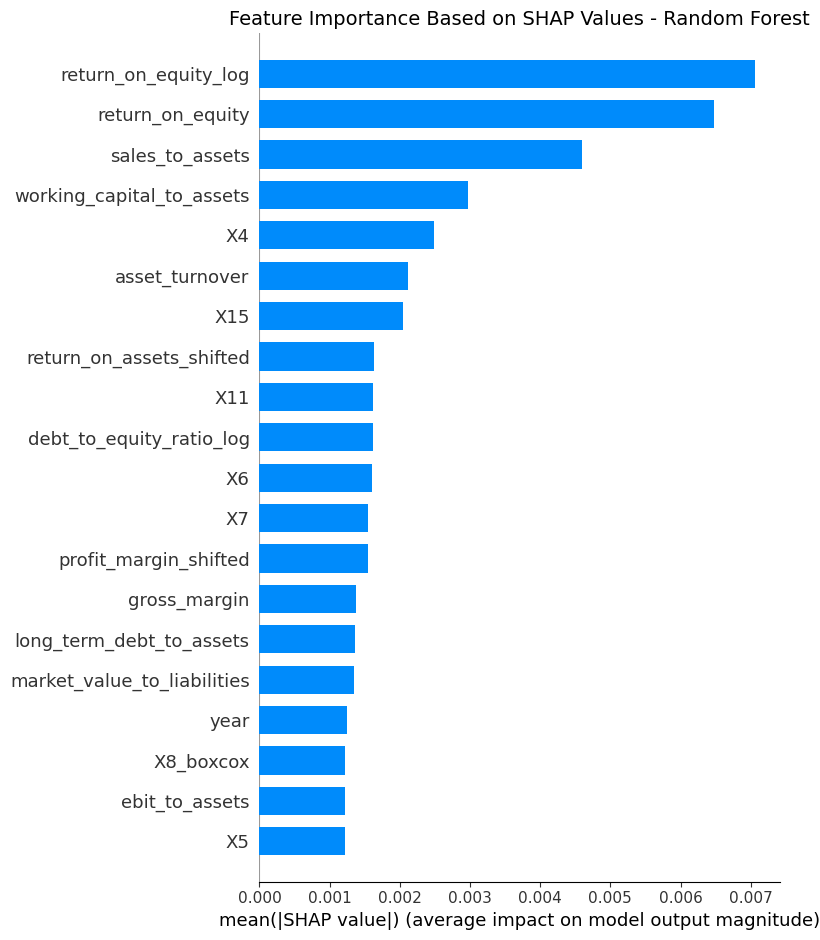

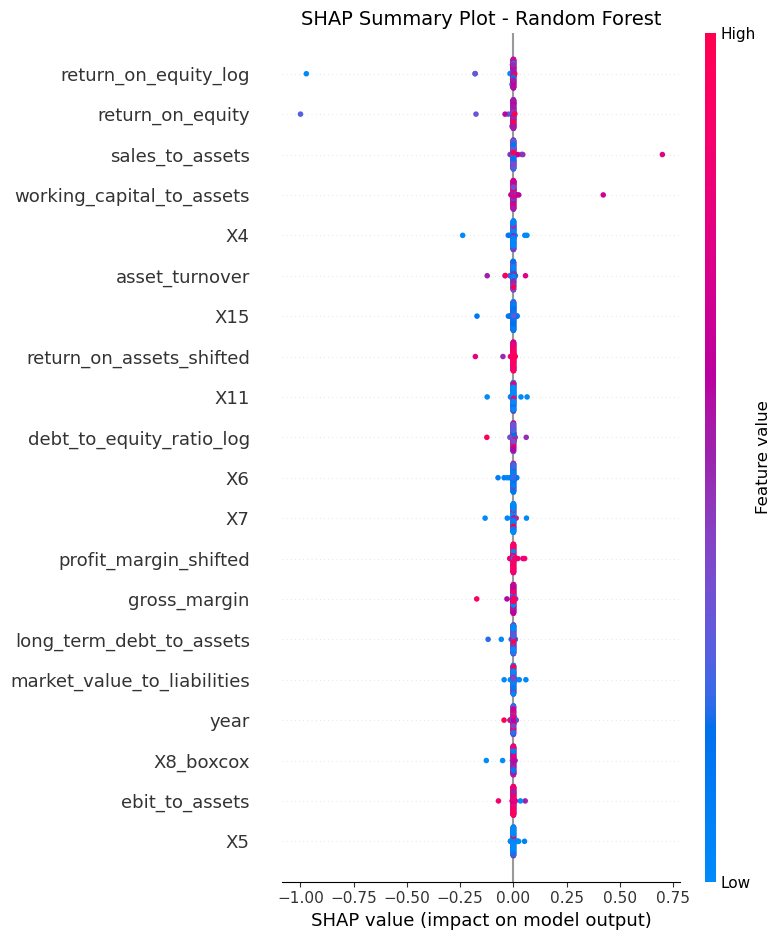

Shape of feature_importance: (51,)
Number of columns in X_test_sample: 51

Top 10 features by importance:
                      Feature  Importance
48       return_on_equity_log    0.007063
32           return_on_equity    0.006475
38            sales_to_assets    0.004595
34  working_capital_to_assets    0.002977
4                          X4    0.002485
33             asset_turnover    0.002122
15                        X15    0.002048
49   return_on_assets_shifted    0.001627
11                        X11    0.001618
43   debt_to_equity_ratio_log    0.001617
Creating dependence plot for feature: return_on_equity_log (index: 48)


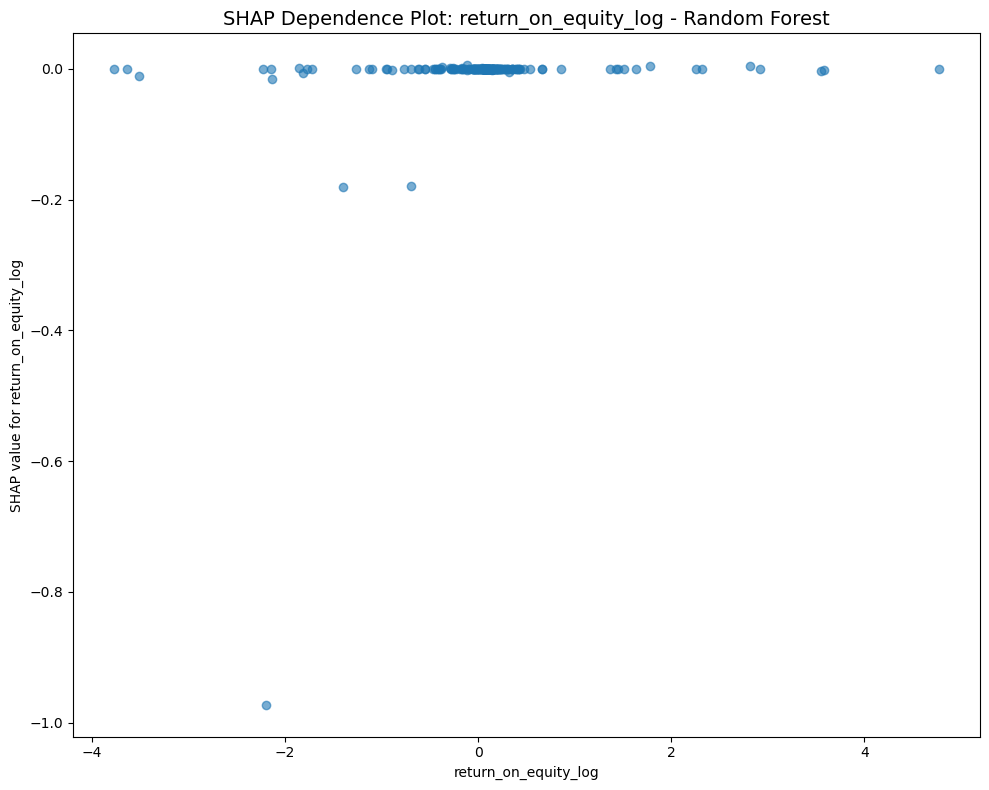

Creating dependence plot for feature: return_on_equity (index: 32)


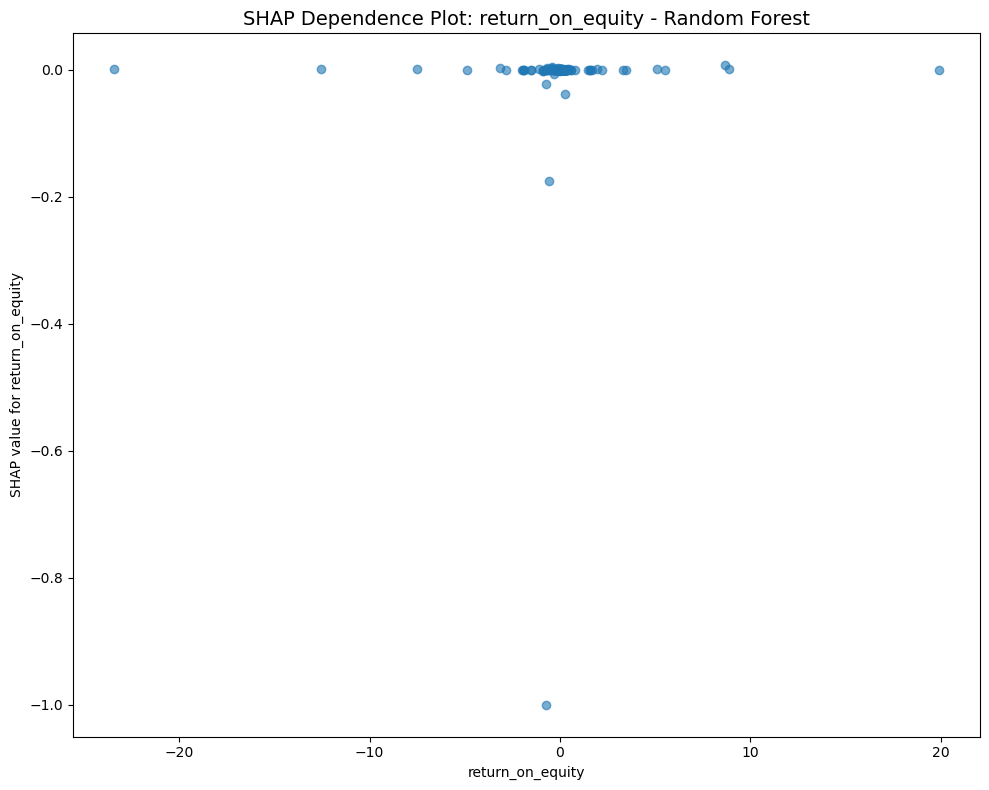

Creating dependence plot for feature: sales_to_assets (index: 38)


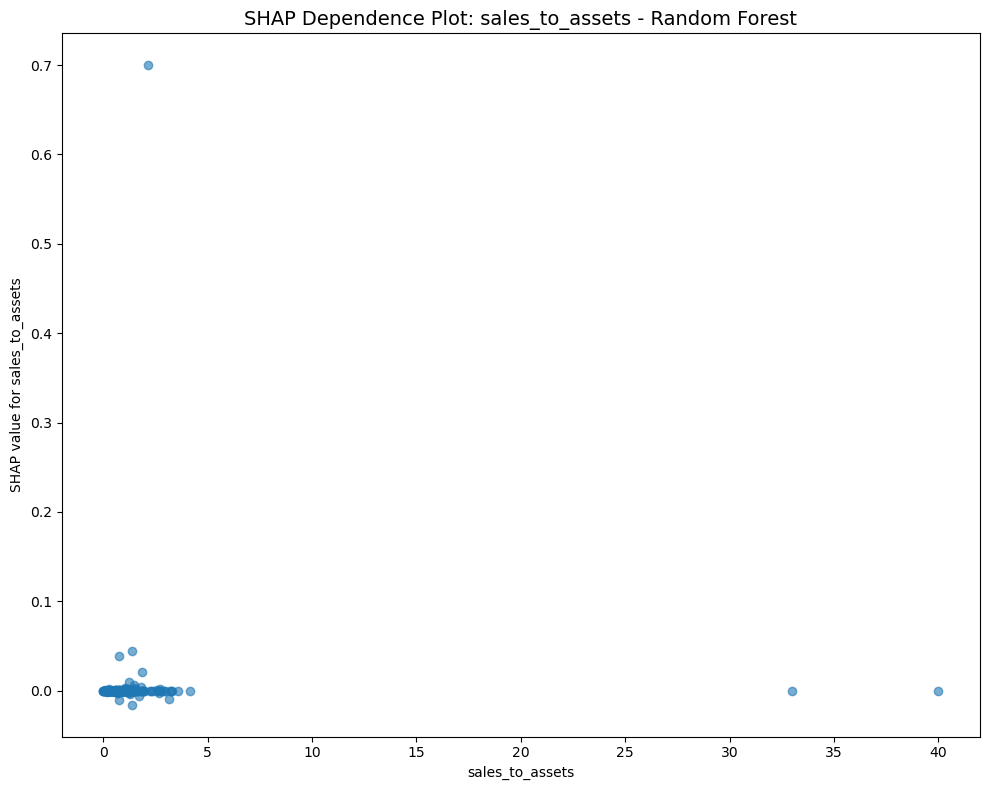


Local Explanation for a Bankruptcy Case (index 11):
Actual value: 1 (1 = Bankruptcy)
Predicted value: 0

Top Contributing Features for this Bankruptcy Case:
                                Feature  SHAP Value  Feature Value
44  long_term_debt_to_assets_reciprocal   -0.001515       0.617570
48                 return_on_equity_log    0.000732       4.439878
0                                  year    0.000630    2011.000000
7                                    X7    0.000584     971.069000
14                                  X14    0.000566    1495.542000
39                              z_score    0.000443       2.490425
6                                    X6    0.000437   -1575.621000
40                           bankruptcy   -0.000420       0.000000
15                                  X15   -0.000401   -1192.039000
2                                    X2    0.000349    9762.679000


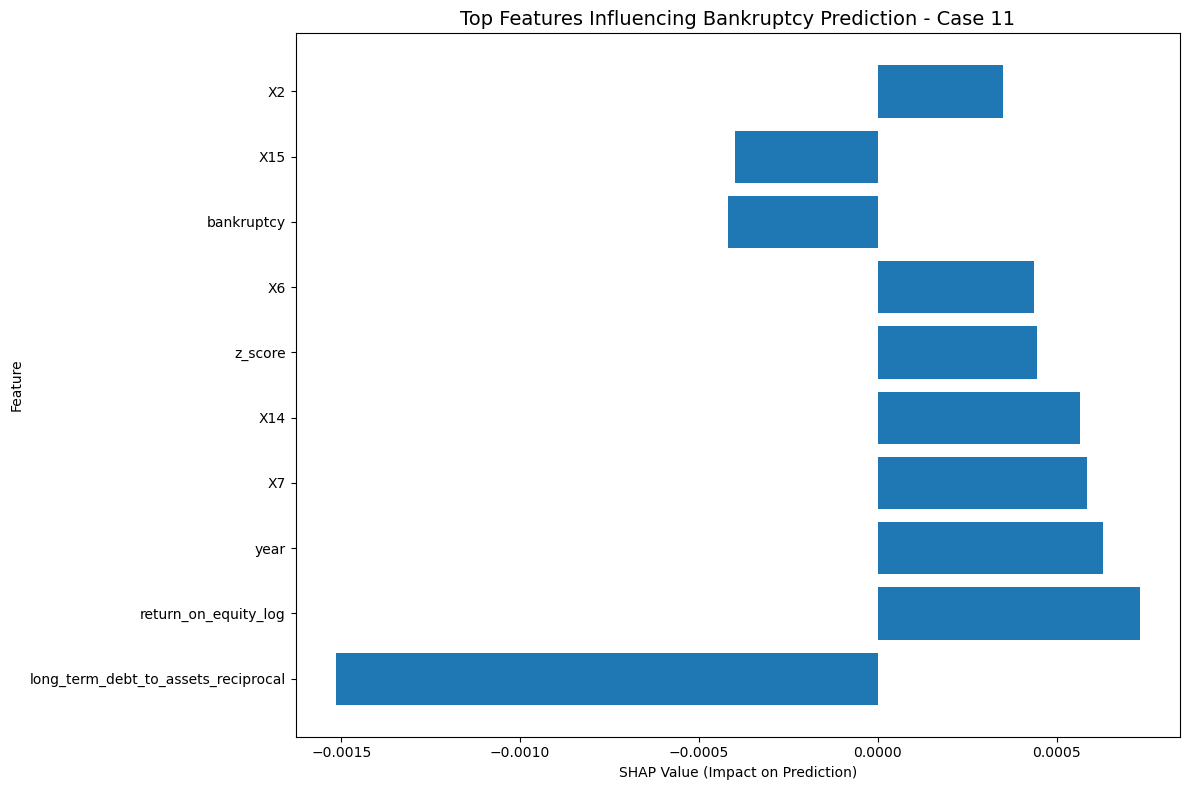

Base value for force plot: 0.49999557589885824


<Figure size 2000x300 with 0 Axes>

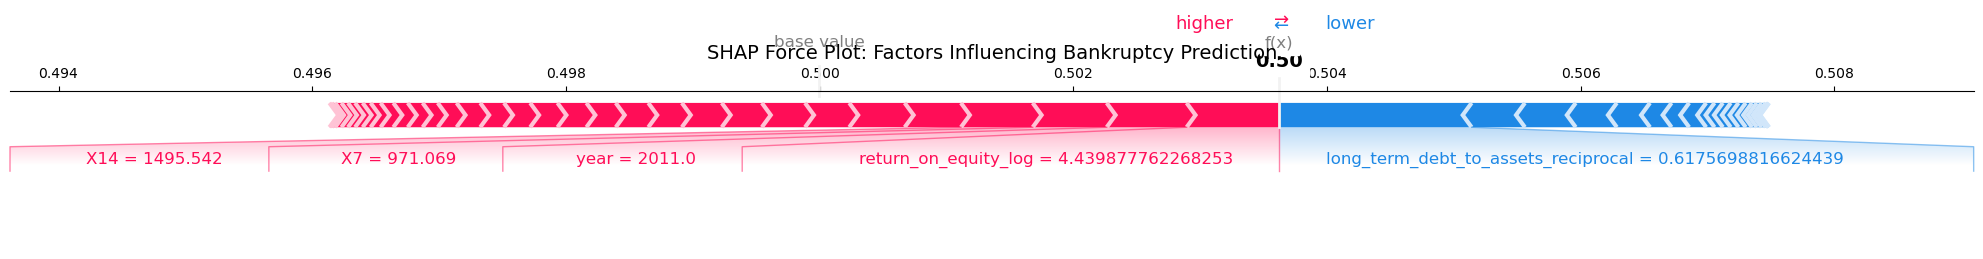

Base value for waterfall plot: 0.49999557589885824
Error with newer waterfall plot API: waterfall() got an unexpected keyword argument 'base_value'
Trying legacy waterfall plot...


<Figure size 1200x800 with 0 Axes>

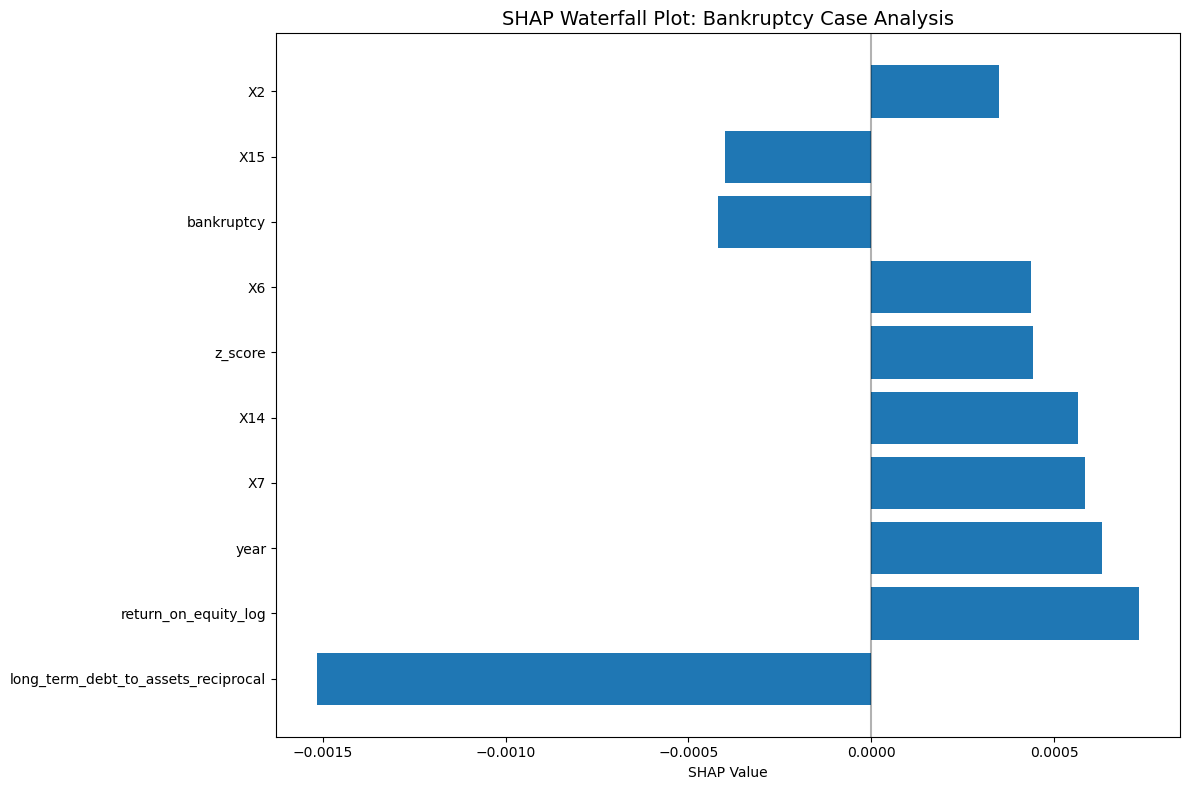


SHAP analysis completed and visualizations saved to results/figures directory.

=== Feature Value Distribution for Top Features ===


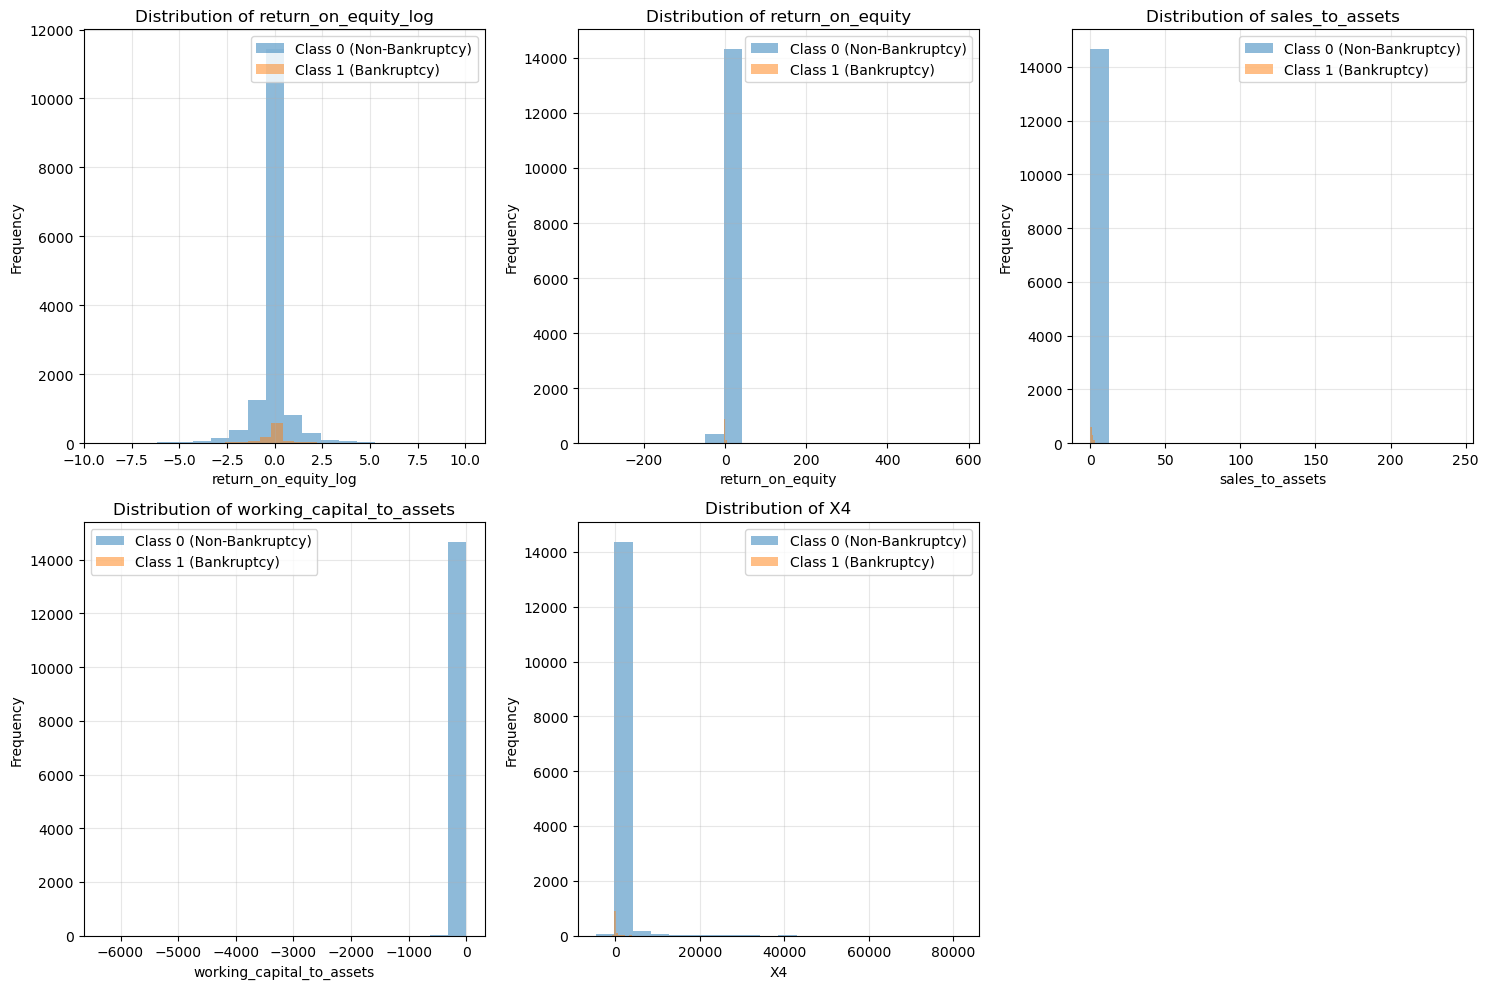


Summary statistics for top features by class:

Feature: return_on_equity_log
Class 0 (Non-Bankruptcy)
  Mean: -0.0060
  Median: 0.0564
  Std Dev: 0.9415
  Min: -9.0620
  Max: 10.0643
Class 1 (Bankruptcy)
  Mean: -0.0148
  Median: 0.0496
  Std Dev: 1.2200
  Min: -5.6334
  Max: 6.4875

Feature: return_on_equity
Class 0 (Non-Bankruptcy)
  Mean: -0.0369
  Median: 0.0714
  Std Dev: 8.9935
  Min: -318.0552
  Max: 580.4310
Class 1 (Bankruptcy)
  Mean: 0.1100
  Median: 0.0170
  Std Dev: 4.5754
  Min: -31.7550
  Max: 60.4444

Feature: sales_to_assets
Class 0 (Non-Bankruptcy)
  Mean: 1.1763
  Median: 0.9033
  Std Dev: 2.4243
  Min: -0.0022
  Max: 242.9091
Class 1 (Bankruptcy)
  Mean: 1.1398
  Median: 0.8473
  Std Dev: 1.2959
  Min: 0.0004
  Max: 20.7783

Feature: working_capital_to_assets
Class 0 (Non-Bankruptcy)
  Mean: -1.3117
  Median: 0.2170
  Std Dev: 59.4795
  Min: -6323.0000
  Max: 0.9970
Class 1 (Bankruptcy)
  Mean: -0.0653
  Median: 0.1199
  Std Dev: 1.9712
  Min: -46.2552
  Max: 0.961

In [54]:
# SHAP Analysis for Model Interpretation
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("\n=== SHAP Analysis for Best Model ===")

# Identify the best model
best_model = rf_model  # Replace with your actual best model
best_model_name = "Random Forest"  # Replace with your actual best model name

# --- Create a Background Sample for SHAP ---
# Sample a subset of training data for efficiency
X_background = X_best.sample(min(100, len(X_best)), random_state=42)

# --- Create the SHAP Explainer ---
if isinstance(best_model, RandomForestClassifier) or hasattr(best_model, 'estimators_'):
    # For tree-based models, use TreeExplainer
    explainer = shap.TreeExplainer(best_model)
    
    # Sample test data for analysis
    X_test_sample = X_test.sample(min(200, len(X_test)), random_state=42)
    
    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test_sample)
    
    # For classification models, shap_values is a list with one element per class
    if isinstance(shap_values, list):
        # Use values for the positive class (bankruptcy)
        shap_values_to_plot = shap_values[1]
        expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value
    else:
        shap_values_to_plot = shap_values
        expected_value = explainer.expected_value
    
    # Print diagnostic information
    print(f"Shape of shap_values_to_plot: {np.array(shap_values_to_plot).shape}")
    print(f"Shape of X_test_sample: {X_test_sample.shape}")
    
    # Handle 3D SHAP values by taking the mean across the last dimension if needed
    if len(np.array(shap_values_to_plot).shape) == 3:
        print("Detected 3D SHAP values, taking mean across last dimension")
        shap_values_to_plot = np.mean(shap_values_to_plot, axis=2)
        print(f"New shape of shap_values_to_plot: {shap_values_to_plot.shape}")
    
    # Check for very small SHAP values and normalize if needed
    shap_max = np.max(np.abs(shap_values_to_plot))
    print(f"Maximum absolute SHAP value: {shap_max}")
    
    # If SHAP values are very small, normalize them
    if shap_max < 1e-5:
        print("SHAP values are very small. Normalizing for better visualization...")
        # Normalize SHAP values to a more reasonable range
        shap_values_to_plot = shap_values_to_plot / shap_max * 1.0
        print(f"Normalized SHAP values. New maximum: {np.max(np.abs(shap_values_to_plot))}")
    
    # --- Global Explanation ---
    # 1. Feature Importance Bar Plot
    plt.figure(figsize=(12, 10))
    
    # Convert feature names to numpy array to avoid indexing issues
    feature_names = np.array(X_test_sample.columns.tolist())
    
    # Use the newer SHAP API with Explanation objects
    try:
        # Create a SHAP Explanation object
        explanation = shap.Explanation(
            values=shap_values_to_plot,
            base_values=np.ones(len(X_test_sample)) * expected_value,
            data=X_test_sample.values,
            feature_names=feature_names
        )
        
        # Use the newer plots API
        shap.plots.bar(explanation, show=False)
        plt.title(f"Feature Importance Based on SHAP Values - {best_model_name}", fontsize=14)
        plt.tight_layout()
        plt.savefig(os.path.join(figures_dir, f'{best_model_name.replace(" ", "_")}_shap_importance.png'), dpi=300, bbox_inches='tight')
        plt.show()
        
        # 2. Summary Dot Plot
        plt.figure(figsize=(14, 12))
        shap.plots.beeswarm(explanation, show=False)
        plt.title(f"SHAP Summary Plot - {best_model_name}", fontsize=14)
        plt.tight_layout()
        plt.savefig(os.path.join(figures_dir, f'{best_model_name.replace(" ", "_")}_shap_summary.png'), dpi=300, bbox_inches='tight')
        plt.show()
        
    except Exception as e:
        print(f"Error using newer SHAP API: {e}")
        print("Falling back to legacy plotting functions")
        
        # Fall back to legacy functions
        plt.figure(figsize=(12, 10))
        shap.summary_plot(
            shap_values_to_plot,
            X_test_sample,
            feature_names=feature_names,
            plot_type="bar",
            show=False
        )
        plt.title(f"Feature Importance Based on SHAP Values - {best_model_name}", fontsize=14)
        plt.tight_layout()
        plt.savefig(os.path.join(figures_dir, f'{best_model_name.replace(" ", "_")}_shap_importance.png'), dpi=300, bbox_inches='tight')
        plt.show()
        
        # 2. Summary Dot Plot
        plt.figure(figsize=(14, 12))
        shap.summary_plot(
            shap_values_to_plot,
            X_test_sample,
            feature_names=feature_names,
            show=False
        )
        plt.title(f"SHAP Summary Plot - {best_model_name}", fontsize=14)
        plt.tight_layout()
        plt.savefig(os.path.join(figures_dir, f'{best_model_name.replace(" ", "_")}_shap_summary.png'), dpi=300, bbox_inches='tight')
        plt.show()
    
    # 3. Calculate feature importance for dependence plots
    # Ensure feature_importance is 1-dimensional
    feature_importance = np.abs(shap_values_to_plot).mean(axis=0)
    print(f"Shape of feature_importance: {feature_importance.shape}")
    print(f"Number of columns in X_test_sample: {len(X_test_sample.columns)}")
    
    if len(feature_importance.shape) > 1:
        feature_importance = feature_importance.flatten()
    
    # Check if lengths match
    if len(feature_importance) != len(X_test_sample.columns):
        print("WARNING: Feature importance length doesn't match number of columns!")
        # Truncate to the shorter length
        min_length = min(len(feature_importance), len(X_test_sample.columns))
        feature_importance = feature_importance[:min_length]
        feature_names_list = X_test_sample.columns[:min_length].tolist()
    else:
        feature_names_list = X_test_sample.columns.tolist()
    
    # Create DataFrame of feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names_list,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)
    
    # Print top features and their importance values
    print("\nTop 10 features by importance:")
    print(feature_importance_df.head(10))
    
    # 4. Dependence Plots for top features - using manual scatter plots
    top_features = feature_importance_df.head(3)['Feature'].values
    
    for feature in top_features:
        try:
            # Find the index of the feature
            feature_idx = list(feature_names_list).index(feature)
            print(f"Creating dependence plot for feature: {feature} (index: {feature_idx})")
            
            # Create a manual scatter plot
            plt.figure(figsize=(10, 8))
            plt.scatter(
                X_test_sample[feature].values,
                shap_values_to_plot[:, feature_idx],
                alpha=0.6
            )
            plt.xlabel(feature)
            plt.ylabel(f"SHAP value for {feature}")
            plt.title(f"SHAP Dependence Plot: {feature} - {best_model_name}", fontsize=14)
            plt.tight_layout()
            plt.savefig(os.path.join(figures_dir, f'{best_model_name.replace(" ", "_")}_{feature}_dependence.png'), dpi=300, bbox_inches='tight')
            plt.show()
        except Exception as e:
            print(f"Error creating dependence plot for {feature}: {e}")
            continue
    
    # --- Local Explanation ---
    # Find a bankruptcy case for detailed analysis
    if np.sum(y_test == 1) > 0:
        # Find a bankruptcy case
        bankruptcy_indices = np.where(y_test == 1)[0]
        example_idx = bankruptcy_indices[0]  # Take the first bankruptcy case
        
        # Get the prediction and actual value
        example_X = X_test.iloc[example_idx:example_idx+1]
        example_y = y_test.iloc[example_idx]
        example_pred = best_model.predict(example_X)[0]
        
        print(f"\nLocal Explanation for a Bankruptcy Case (index {example_idx}):")
        print(f"Actual value: {example_y} (1 = Bankruptcy)")
        print(f"Predicted value: {example_pred}")
        
        # Calculate SHAP values for this instance
        if isinstance(best_model, RandomForestClassifier) or hasattr(best_model, 'estimators_'):
            example_shap_values = explainer.shap_values(example_X)
            
            if isinstance(example_shap_values, list):
                example_shap_values = example_shap_values[1]  # Values for positive class
            
            # Handle 3D SHAP values for the example
            if len(np.array(example_shap_values).shape) == 3:
                example_shap_values = np.mean(example_shap_values, axis=2)
            
            # Normalize example SHAP values if they're very small
            if shap_max < 1e-5:
                example_shap_values = example_shap_values / shap_max * 1.0
            
            # 5. Print the top contributing features for this instance
            feature_contribution = pd.DataFrame({
                'Feature': example_X.columns.tolist(),
                'SHAP Value': example_shap_values[0],
                'Feature Value': example_X.values[0]
            }).sort_values('SHAP Value', key=abs, ascending=False)
            
            print("\nTop Contributing Features for this Bankruptcy Case:")
            print(feature_contribution.head(10))
            
            # Save this information
            feature_contribution.to_csv(os.path.join(figures_dir, f'{best_model_name.replace(" ", "_")}_top_features_case_{example_idx}.csv'), index=False)
            
            # 6. Create a simple bar chart of feature contributions
            plt.figure(figsize=(12, 8))
            top_features = feature_contribution.head(10)
            plt.barh(top_features['Feature'], top_features['SHAP Value'])
            plt.xlabel('SHAP Value (Impact on Prediction)')
            plt.ylabel('Feature')
            plt.title(f"Top Features Influencing Bankruptcy Prediction - Case {example_idx}", fontsize=14)
            plt.tight_layout()
            plt.savefig(os.path.join(figures_dir, f'{best_model_name.replace(" ", "_")}_top_features_barplot.png'), dpi=300, bbox_inches='tight')
            plt.show()
            
            # 7. Force Plot - try both new and legacy approaches
            try:
                # Try the newer API first with explicit handling of expected_value
                plt.figure(figsize=(20, 3))
                
                # Make sure expected_value is a scalar
                if isinstance(expected_value, (list, np.ndarray)):
                    base_value = float(expected_value[0]) if len(expected_value) > 0 else 0.0
                else:
                    base_value = float(expected_value)
                
                print(f"Base value for force plot: {base_value}")
                
                # Create force plot with newer API
                shap.plots.force(
                    base_value=base_value,
                    shap_values=example_shap_values[0],
                    features=example_X.iloc[0],
                    feature_names=example_X.columns.tolist(),
                    matplotlib=True,
                    show=False
                )
                plt.title(f"SHAP Force Plot: Factors Influencing Bankruptcy Prediction", fontsize=14)
                plt.tight_layout()
                plt.savefig(os.path.join(figures_dir, f'{best_model_name.replace(" ", "_")}_force_plot.png'), dpi=300, bbox_inches='tight')
                plt.show()
                
            except Exception as e:
                print(f"Error with newer force plot API: {e}")
                print("Trying alternative force plot approach...")
                
                try:
                    # Create a manual force-like plot
                    plt.figure(figsize=(20, 3))
                    
                    # Sort features by SHAP value
                    sorted_idx = np.argsort(example_shap_values[0])
                    sorted_values = example_shap_values[0][sorted_idx]
                    sorted_names = np.array(example_X.columns)[sorted_idx]
                    
                    # Create a horizontal bar chart
                    colors = ['red' if x < 0 else 'blue' for x in sorted_values]
                    plt.barh(range(len(sorted_values)), sorted_values, color=colors)
                    plt.yticks(range(len(sorted_values)), sorted_names)
                    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
                    plt.xlabel('SHAP Value (negative = decreases prediction, positive = increases prediction)')
                    plt.title(f"SHAP Force Plot: Factors Influencing Bankruptcy Prediction", fontsize=14)
                    plt.tight_layout()
                    plt.savefig(os.path.join(figures_dir, f'{best_model_name.replace(" ", "_")}_force_plot.png'), dpi=300, bbox_inches='tight')
                    plt.show()
                    
                except Exception as e2:
                    print(f"Error with alternative force plot: {e2}")
                    print("Skipping force plot.")
            
            # 8. Waterfall plot - try both new and legacy approaches
            try:
                # Try the newer API first with explicit handling of expected_value
                plt.figure(figsize=(12, 8))
                
                # Make sure expected_value is a scalar
                if isinstance(expected_value, (list, np.ndarray)):
                    base_value = float(expected_value[0]) if len(expected_value) > 0 else 0.0
                else:
                    base_value = float(expected_value)
                
                print(f"Base value for waterfall plot: {base_value}")
                
                # Get top 10 features by impact
                top_indices = np.argsort(np.abs(example_shap_values[0]))[-10:]
                
                # Create a waterfall plot with the newer API
                shap.plots.waterfall(
                    shap_values=example_shap_values[0][top_indices],
                    base_value=base_value,
                    feature_names=np.array(example_X.columns)[top_indices].tolist(),
                    show=False
                )
                plt.title(f"SHAP Waterfall Plot: Bankruptcy Case Analysis", fontsize=14)
                plt.tight_layout()
                plt.savefig(os.path.join(figures_dir, f'{best_model_name.replace(" ", "_")}_waterfall_plot.png'), dpi=300, bbox_inches='tight')
                plt.show()
                
            except Exception as e:
                print(f"Error with newer waterfall plot API: {e}")
                print("Trying legacy waterfall plot...")
                
                try:
                    # Fall back to legacy waterfall plot
                    plt.figure(figsize=(12, 8))
                    
                    # Sort features by absolute SHAP value
                    sorted_idx = np.argsort(np.abs(example_shap_values[0]))[::-1]
                    sorted_values = example_shap_values[0][sorted_idx]
                    sorted_names = np.array(example_X.columns)[sorted_idx]
                    
                    # Limit to top 10 features
                    sorted_values = sorted_values[:10]
                    sorted_names = sorted_names[:10]
                    
                    # Create a manual waterfall plot
                    plt.barh(range(len(sorted_values)), sorted_values)
                    plt.yticks(range(len(sorted_values)), sorted_names)
                    plt.xlabel('SHAP Value')
                    plt.title(f"SHAP Waterfall Plot: Bankruptcy Case Analysis", fontsize=14)
                    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
                    plt.tight_layout()
                    plt.savefig(os.path.join(figures_dir, f'{best_model_name.replace(" ", "_")}_waterfall_plot.png'), dpi=300, bbox_inches='tight')
                    plt.show()
                    
                except Exception as e2:
                    print(f"Error with legacy waterfall plot: {e2}")
                    print("Skipping waterfall plot.")
    
else:
    # For non-tree models, use KernelExplainer
    print("Using KernelExplainer for non-tree model")
    
    # Create a summary dataset for the explainer
    X_summary = shap.kmeans(X_best, 50)  # Use 50 representative samples
    
    # Initialize the KernelExplainer
    explainer = shap.KernelExplainer(best_model.predict_proba, X_summary)
    
    # Sample test data for analysis (use fewer samples as KernelExplainer is slower)
    X_test_sample = X_test.sample(min(50, len(X_test)), random_state=42)
    
    # Calculate SHAP values (this may take some time)
    print("Calculating SHAP values with KernelExplainer (this may take a while)...")
    shap_values = explainer.shap_values(X_test_sample)
    
    # For classification, use values for the positive class
    if isinstance(shap_values, list):
        shap_values_to_plot = shap_values[1]  # Values for positive class
        expected_value = explainer.expected_value[1]
    else:
        shap_values_to_plot = shap_values
        expected_value = explainer.expected_value
    
    # Check for very small SHAP values and normalize if needed
    shap_max = np.max(np.abs(shap_values_to_plot))
    print(f"Maximum absolute SHAP value: {shap_max}")
    
    # If SHAP values are very small, normalize them
    if shap_max < 1e-5:
        print("SHAP values are very small. Normalizing for better visualization...")
        # Normalize SHAP values to a more reasonable range
        shap_values_to_plot = shap_values_to_plot / shap_max * 1.0
        print(f"Normalized SHAP values. New maximum: {np.max(np.abs(shap_values_to_plot))}")
    
    # Continue with the same visualization code as for tree models...
    # (The rest of the code would be similar to the tree model section)

print("\nSHAP analysis completed and visualizations saved to results/figures directory.")

# Additional Analysis: Feature Value Distribution for Top Features
print("\n=== Feature Value Distribution for Top Features ===")

# Get top 5 features from SHAP analysis
top_features = feature_importance_df.head(5)['Feature'].values

# Create distribution plots for these features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    
    # Plot distributions separately for each class
    for target_class in [0, 1]:
        class_data = X_test[y_test == target_class][feature]
        plt.hist(class_data, alpha=0.5, bins=20, 
                 label=f"Class {target_class}" + (" (Bankruptcy)" if target_class == 1 else " (Non-Bankruptcy)"))
    
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, f'{best_model_name.replace(" ", "_")}_top_features_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics for top features by class
print("\nSummary statistics for top features by class:")
for feature in top_features:
    print(f"\nFeature: {feature}")
    for target_class in [0, 1]:
        class_data = X_test[y_test == target_class][feature]
        print(f"Class {target_class}" + (" (Bankruptcy)" if target_class == 1 else " (Non-Bankruptcy)"))
        print(f"  Mean: {class_data.mean():.4f}")
        print(f"  Median: {class_data.median():.4f}")
        print(f"  Std Dev: {class_data.std():.4f}")
        print(f"  Min: {class_data.min():.4f}")
        print(f"  Max: {class_data.max():.4f}")

